## Маслов Артём Сергеевич, Б01-108а, ФРКТ 4 курс.
## Breast Cancer Data Set
## 'k-ближайших соседей', 'Перцептрон', 'SVM'

In [1]:
from zlib import crc32
import numpy as np

types = ['regression', 'classification']
datasets = {'regression': [{'name': 'Servo Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Servo'}, 
                           {'name': 'Forest Fires Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Forest+Fires'},
                           {'name': 'Boston Housing Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston'}, 
                           {'name': 'Diabetes Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'}],
            'classification': [{'name': 'Spambase Data Set',
                                'url': 'https://archive.ics.uci.edu/ml/datasets/Spambase'}, 
                               {'name': 'Wine Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine'}, 
                               {'name': 'Breast Cancer Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'}, 
                               {'name': 'MNIST',
                                'url': 'http://yann.lecun.com/exdb/mnist/'}]}
methods = {'regression': ['Линейная регрессия', 
                          'Перцептрон', 
                          'Надарая-Ватсона',
                          'SVR'],
           'classification': ['Логистическая регрессия', 
                              'Перцептрон', 
                              'k-ближайших соседей',
                              'Метод потенциальных функций',
                              'Метод Парзеновского окна', 
                              'SVM']}
task = dict()
task['mail'] = "maslov.artem@phystech.edu"
task['id'] = crc32(task['mail'].encode('utf-8'))
np.random.seed(task['id'])
task['type'] = np.random.choice(types)
task['dataset'] = np.random.choice(datasets[task['type']])
task['method'] = np.random.choice(
    methods[task['type']], size=3, replace=False).tolist()


task

{'mail': 'maslov.artem@phystech.edu',
 'id': 2024978130,
 'type': np.str_('classification'),
 'dataset': {'name': 'Breast Cancer Data Set',
  'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'},
 'method': ['k-ближайших соседей', 'Перцептрон', 'SVM']}

## Описание датасета

Датасет содержит информацию о раке груди пациентов. Датасет предоставлен в открытый доступ университетом Висконсина в ноябре 1995.

Скачать датасет можно по ссылке https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic. Скачанный zip-архив содержит два файла: wdbc.data - сам датасет в формате csv-таблицы, и wdbc.names - описание датасета, его авторы, ссылки на статьи, в которых он использовался и описание признаков.

Датасет содержит 569 объектов, у каждого объекта 32 свойства: <br />
1} Id <br />
2} Диагноз (M - malignant - злокачественная опухоль (есть рак), B - benign - доброкачественная опухоль (нет рака)) - предсказываемое значение (ответ). <br />
3-32} Числовые признаки: <br />
3-12} Средние значения признаков. <br />
13-21} Стандартная ошибка $SE = \frac{\sigma}{\sqrt{n}}$ значений признаков, где $\sigma$ - среднеквадратичное отклонение. <br />
22-32} Наихудшее или наибольшее (среднее из трёх наибольших значений) значения признаков.

Все значения признаков записаны с 4 значащими цифрами. В датасете нет пропущенных (не заполненных) признаков. 212 объектов злокачественная опухоль, 357 - доброкачественная.

Признаки:
1) radius - радиус - среднее расстояние от центра до точек по периметру.
2) texture - текстура - среднеквадратичное отклонение чёрно-белых значений пикселей на изображении.
3) perimeter - периметр опухоли.
4) area - площадь опухоли.
5) smoothness - гладкость - локальное отклонение радиуса от среднего значения.
6) compactness - компактность - $(периметр^2 / площадь - 1)$.
7) concavity - вогнутость - выраженность вогнутых участков контура.
8) concave_points - количество вогнутых участков контура.
9) symmetry - симметрия клеточных ядер.
10) fractal_dimension - $("coastline \; approximation" - 1)$.

Для используемых в https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic методов точность предсказания составляет в среднем около 95%.

Согласно статье Prithwish Ghosh, Breast Cancer Wisconsin (Diagnostic) Prediction, International Journal of Science and Research (IJSR), 11(5):178-185,
May, 2022, DOI:10.21275/SR22501213650 рак образуется, когда клетки начинают неконтролируемо делиться. Раковые клетки в груди обычно образуют опухоль, которая обнаруживается рентгеном или ощущается на ощупь как комок. Рак груди встречается в основном у женщин, но и у мужчин. Некоторые опухли в груди не являются раковыми. Они не являются нормальными, но в тоже время не представляют опасности для жизни человека, их называют доброкачественными (benign). Важно уметь классифицировать доброкачественные (bening) и злокачественные (malignant) опухли, так как от своевременного диагноза зависит результат лечения.

Признаки в датасете вычислялись на основе оцифрованного изображения тонкоигольного аспирата (FNA) опухоли молочной железы.

## Библиотеки

In [2]:
import numpy
import math
import pandas
import random
import time
import matplotlib.pyplot as plt
import seaborn
import sklearn
import sklearn.model_selection
from scipy.optimize import curve_fit
import mlxtend
import mlxtend.plotting

In [3]:
def GetFeatureIndex(feature_name : str, type : str):
    nameIndex = Features.Names.index(feature_name)
    typeIndex = Features.Types.index(type)
    return nameIndex + typeIndex * len(Features.Names)

def GetFeatureName(feature_name, type):
    return f"{type} {feature_name}"

class Features:
    Radius = "Radius"
    Texture = "Texture"
    Perimeter = "Perimeter"
    Area = "Area"
    Smoothness = "Smoothness"
    Compactness = "Compactness"
    Concavity = "Concavity"
    ConcavePoints = "Concave points"
    Symmetry = "Symmetry"
    FractalDimension = "Fractal dimension"

    Names = [
        Radius,
        Texture,
        Perimeter,
        Area,
        Smoothness,
        Compactness,
        Concavity,
        ConcavePoints,
        Symmetry,
        FractalDimension
    ]

    TypeMean = "Mean"
    TypeStdErr = "SE"
    TypeWorst = "Worst"

    Types = [
        TypeMean,
        TypeStdErr,
        TypeWorst
    ]

ArrayOfFeatures = [GetFeatureName(x, Features.TypeMean) for x in Features.Names] + \
    [GetFeatureName(x, Features.TypeStdErr) for x in Features.Names] + \
    [GetFeatureName(x, Features.TypeWorst) for x in Features.Names]

def Line(x, a, b):
    return a * x + b

def CalcErrors(popt, cov, precA = 4, precB = 4, printRes = True):
    """
    Вычисляет погрешность МНК.
    Выводит в консоль значения + погрешность.
    Возвращает массив погрешностей.
    """
    errors = []
    for i in range(len(popt)):
        try:
          errors.append(numpy.absolute(cov[i][i])**0.5)
        except:
          errors.append( 0.00 )
    errors = numpy.array(errors)

    if (printRes == True):
        print("a = {:.0{prec}f} sig_a = {:.0{prec}f}".format(popt[0], errors[0], prec = precA))
        print("b = {:.0{prec}f} sig_b = {:.0{prec}f}".format(popt[1], errors[1], prec = precB), '\n')

    return errors

In [4]:
def GetRandomSeed():
    return int((time.time() * 10**8) % 4294967295)

## Загрузка датасета

Для того, чтобы загрузить датасет необходимо. Либо:
1. Скачать с сайта https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic zip-архив.
2. Распаковать архив в папку `breast_cancer_dataset` рядом с текущим файлом `task1.ipynb`
3. В папке breast_cancer_dataset будут лежать два файла: wdbc.data и wdbc.names.

Либо склонировать гит-репозиторий:
```bash
git clone https://github.com/ArtemMaslov/machine_learning_course.git
```
И запустить данный файл из репозитория.

Либо указать путь к датасету в ячейке ниже

In [5]:
dataset = pandas.read_csv("breast_cancer_dataset/wdbc.data",
    header=None, 
    names=["id", "diagnosis"] + ArrayOfFeatures)

dataset.sample(5)

id diagnosis  Mean Radius  Mean Texture  Mean Perimeter  Mean Area  \
397  90401602         B        12.80         17.46           83.05      508.3   
44   85638502         M        13.17         21.81           85.42      531.5   
56     857637         M        19.21         18.57          125.50     1152.0   
157   8711216         B        16.84         19.46          108.40      880.2   
422    906616         B        11.61         16.02           75.46      408.2   

     Mean Smoothness  Mean Compactness  Mean Concavity  Mean Concave points  \
397          0.08044           0.08895         0.07390              0.04083   
44           0.09714           0.10470         0.08259              0.05252   
56           0.10530           0.12670         0.13230              0.08994   
157          0.07445           0.07223         0.05150              0.02771   
422          0.10880           0.11680         0.07097              0.04497   

     ...  Worst Radius  Worst Texture  Worst Perimeter  Worst Area  \
397  ...         13.74          21.06            90.72       591.0   
44   ...         16.23          29.89           105.50       740.7   
56   ...         26.14          28.14           170.10      2145.0   
157  ...         18.22          28.07           120.30      1032.0   
422  ...         12.64          19.67            81.93       475.7   

     Worst Smoothness  Worst Compactness  Worst Concavity  \
397           0.09534             0.1812           0.1901   
44            0.15030             0.3904           0.3728   
56            0.16240             0.3511           0.3879   
157           0.08774             0.1710           0.1882   
422           0.14150             0.2170           0.2302   

     Worst Concave points  Worst Symmetry  Worst Fractal dimension  
397               0.08296          0.1988                  0.07053  
44                0.16070          0.3693                  0.09618  
56                0.20910          0.3537                  0.08294  
157               0.08436          0.2527                  0.05972  
422               0.11050          0.2787                  0.07427  

[5 rows x 32 columns]

In [6]:
print(sum(dataset["diagnosis"] == "M"))
print(sum(dataset["diagnosis"] == "B"))

212
357


## Анализ датасета

Подробное описание датасета приведено выше. Кратко опишем основные моменты:
1. Множество объектов имеет 30 вещественных признаков.
1. Множество ответов состоит из двух элементов: злокачественная опухоль (M), доброкачественная (B).
1. Задача бинарной классификации.
1. 569 объектов, из них 212 - злокачественная опухоль (37% от общего числа), 357 - доброкачественная опухоль (63% от общего числа). Выборка не совсем сбалансирована. 

Спроектируем все объекты на двумерные плоскости. Построим графики отдельно для средних значений, стандартных ошибок и наихудших значений признаков.

Средние значения признаков:

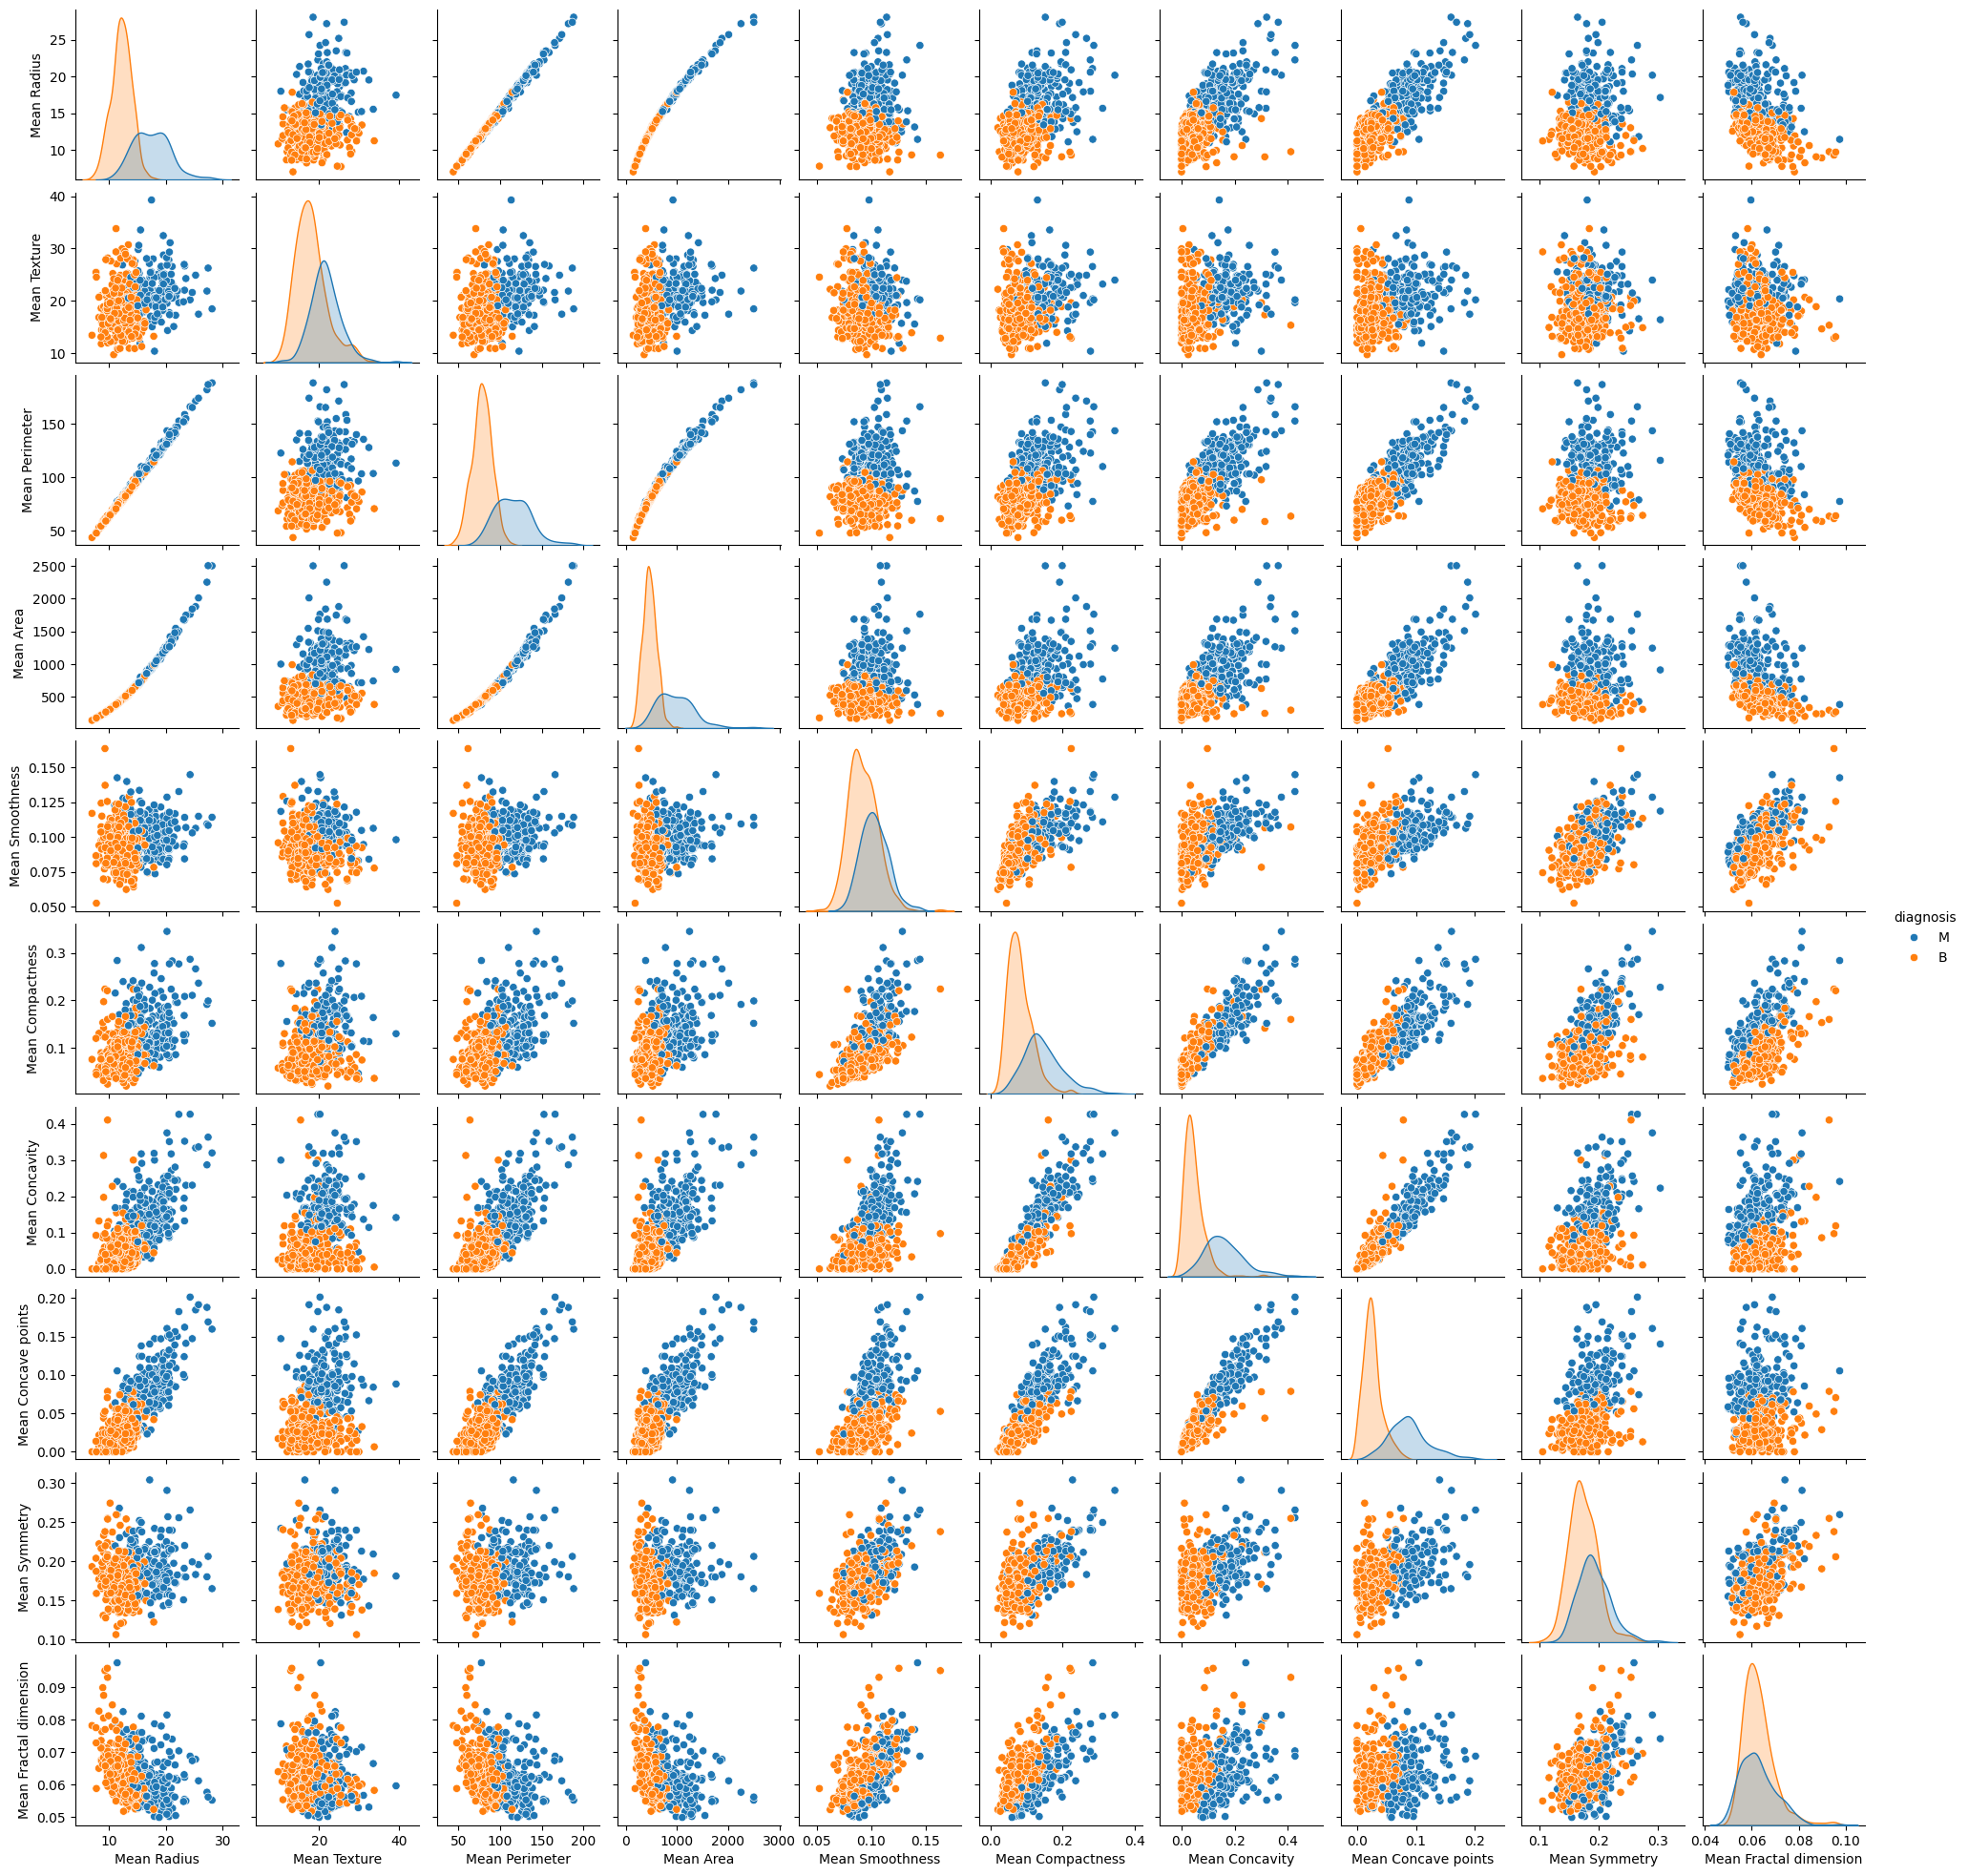

In [7]:
seaborn.pairplot(dataset[dataset.columns[1:12]], hue='diagnosis', height=2)
plt.show()

Стандартные ошибки признаков:

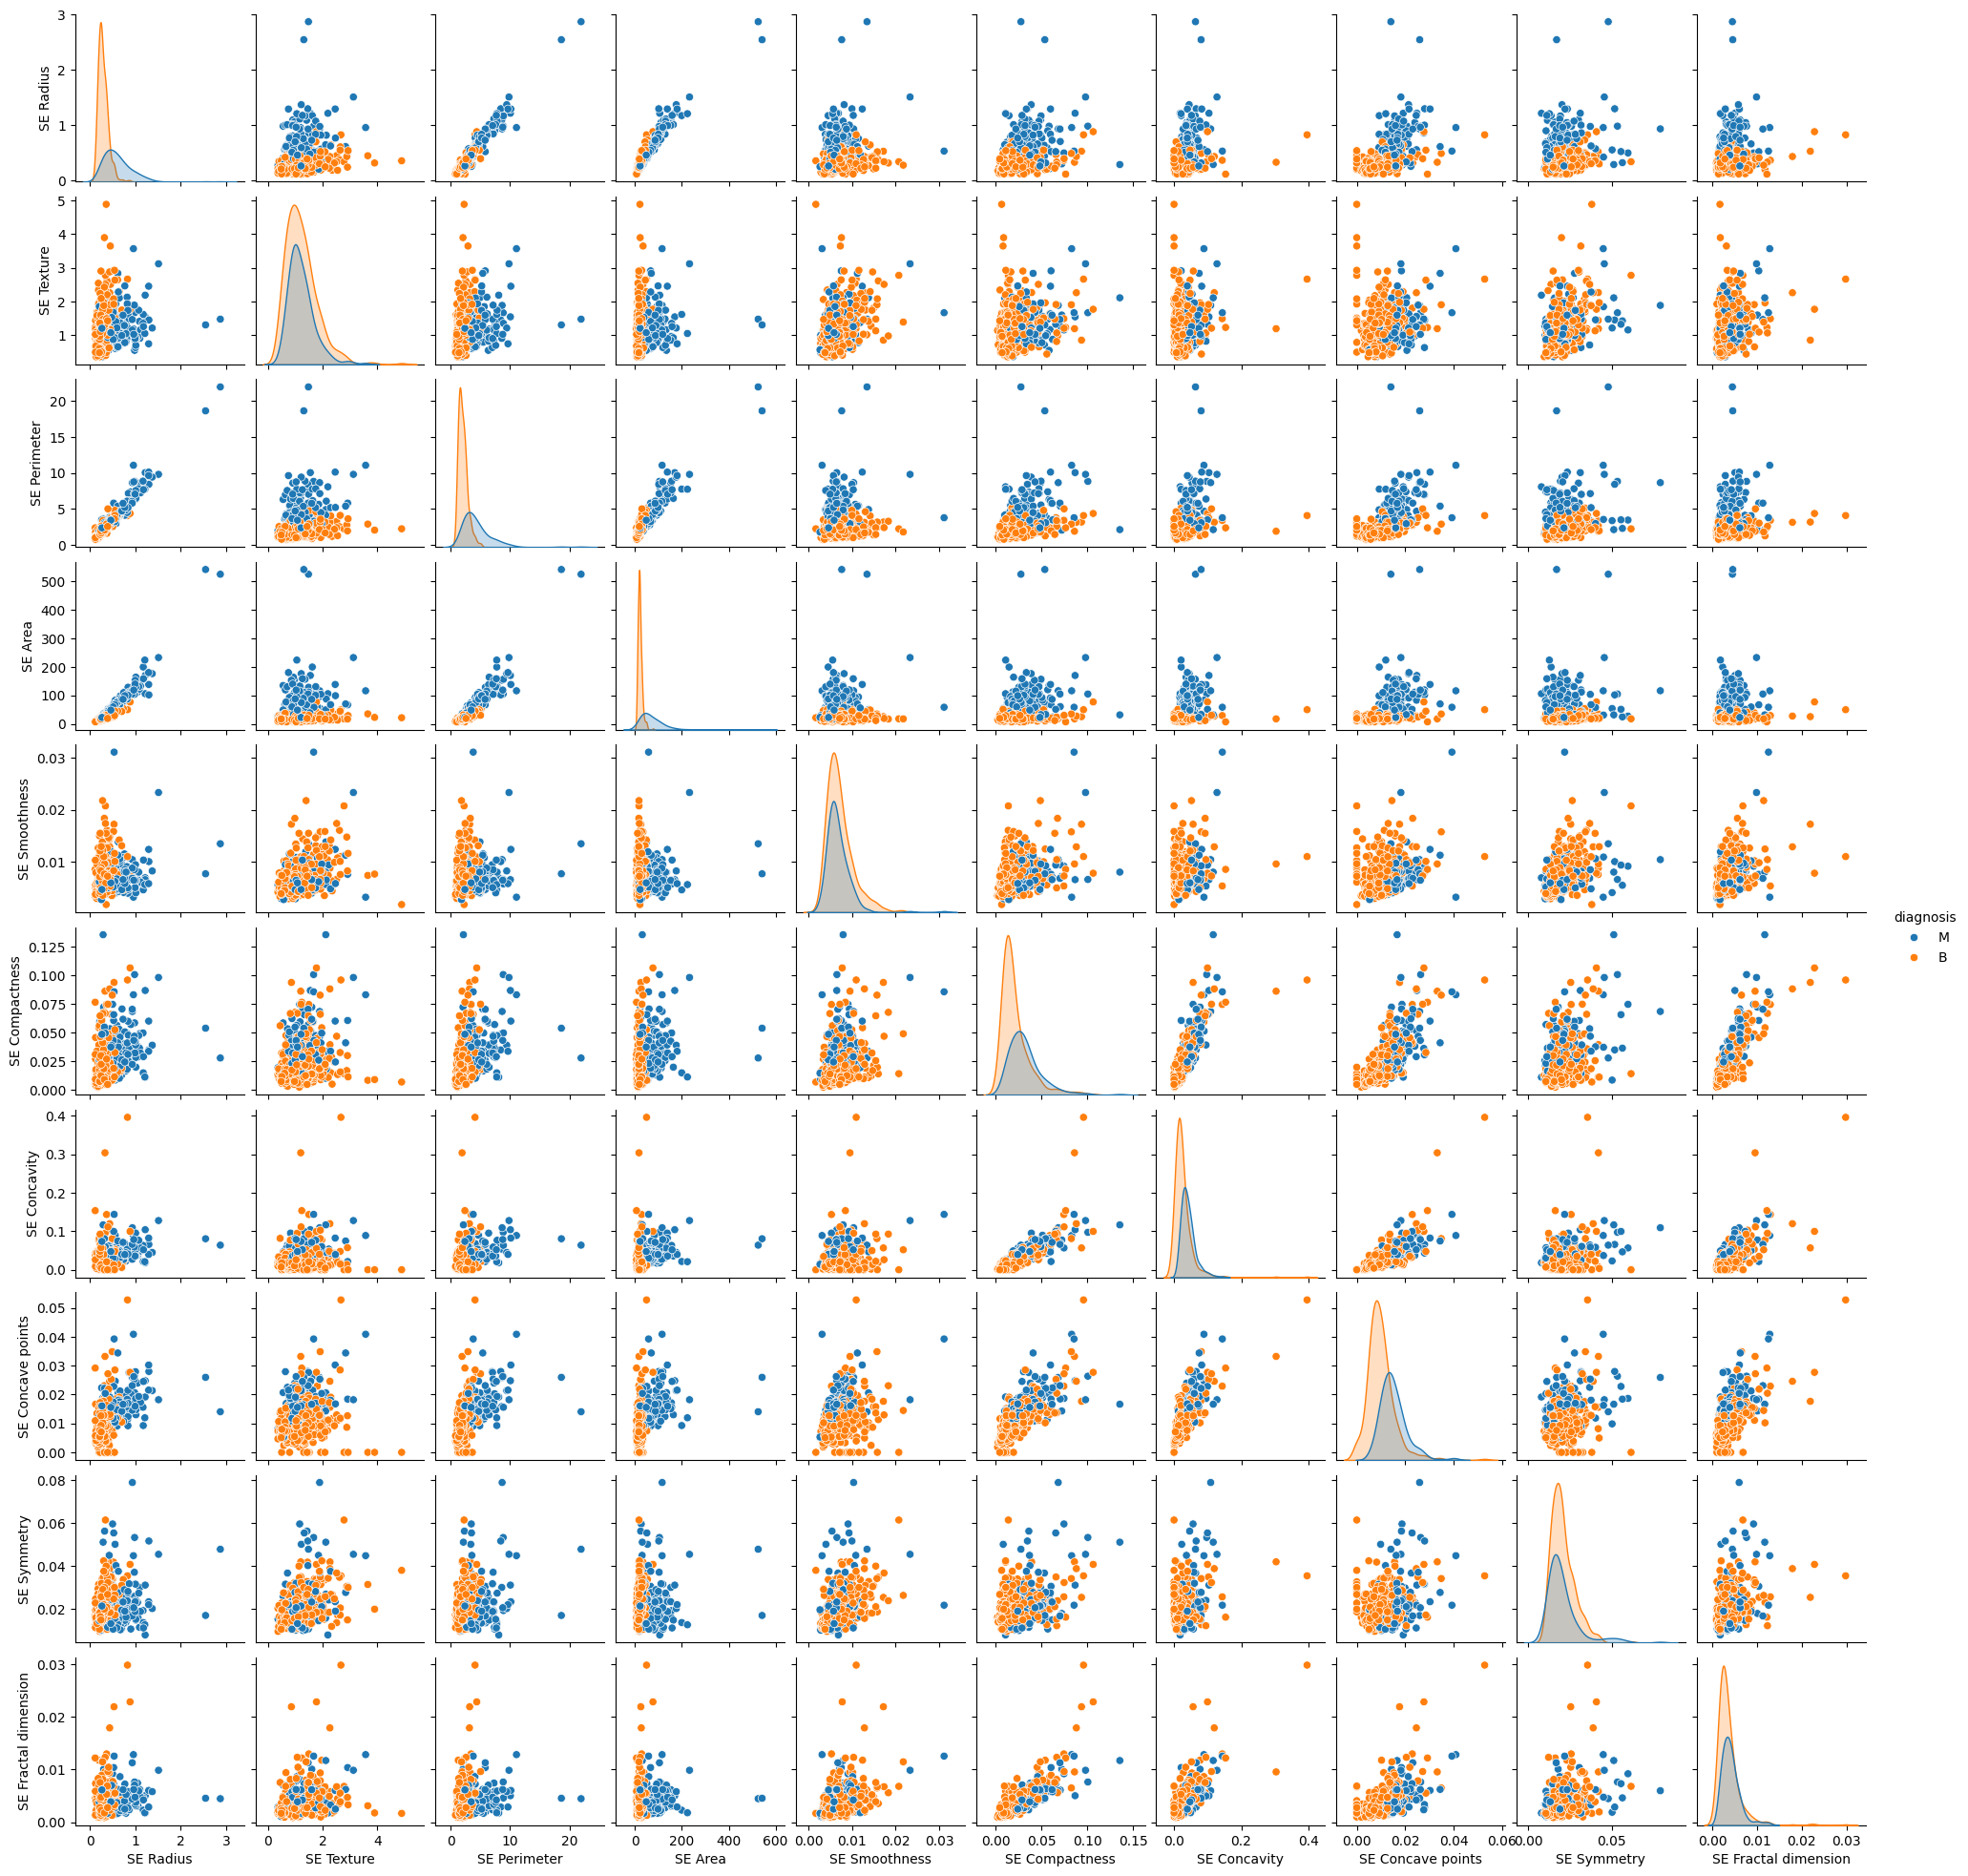

In [8]:
seaborn.pairplot(dataset[[dataset.columns[1]] + list(dataset.columns[12:22])], hue='diagnosis', height=2)
plt.show()

Наихудшие значения признаков:

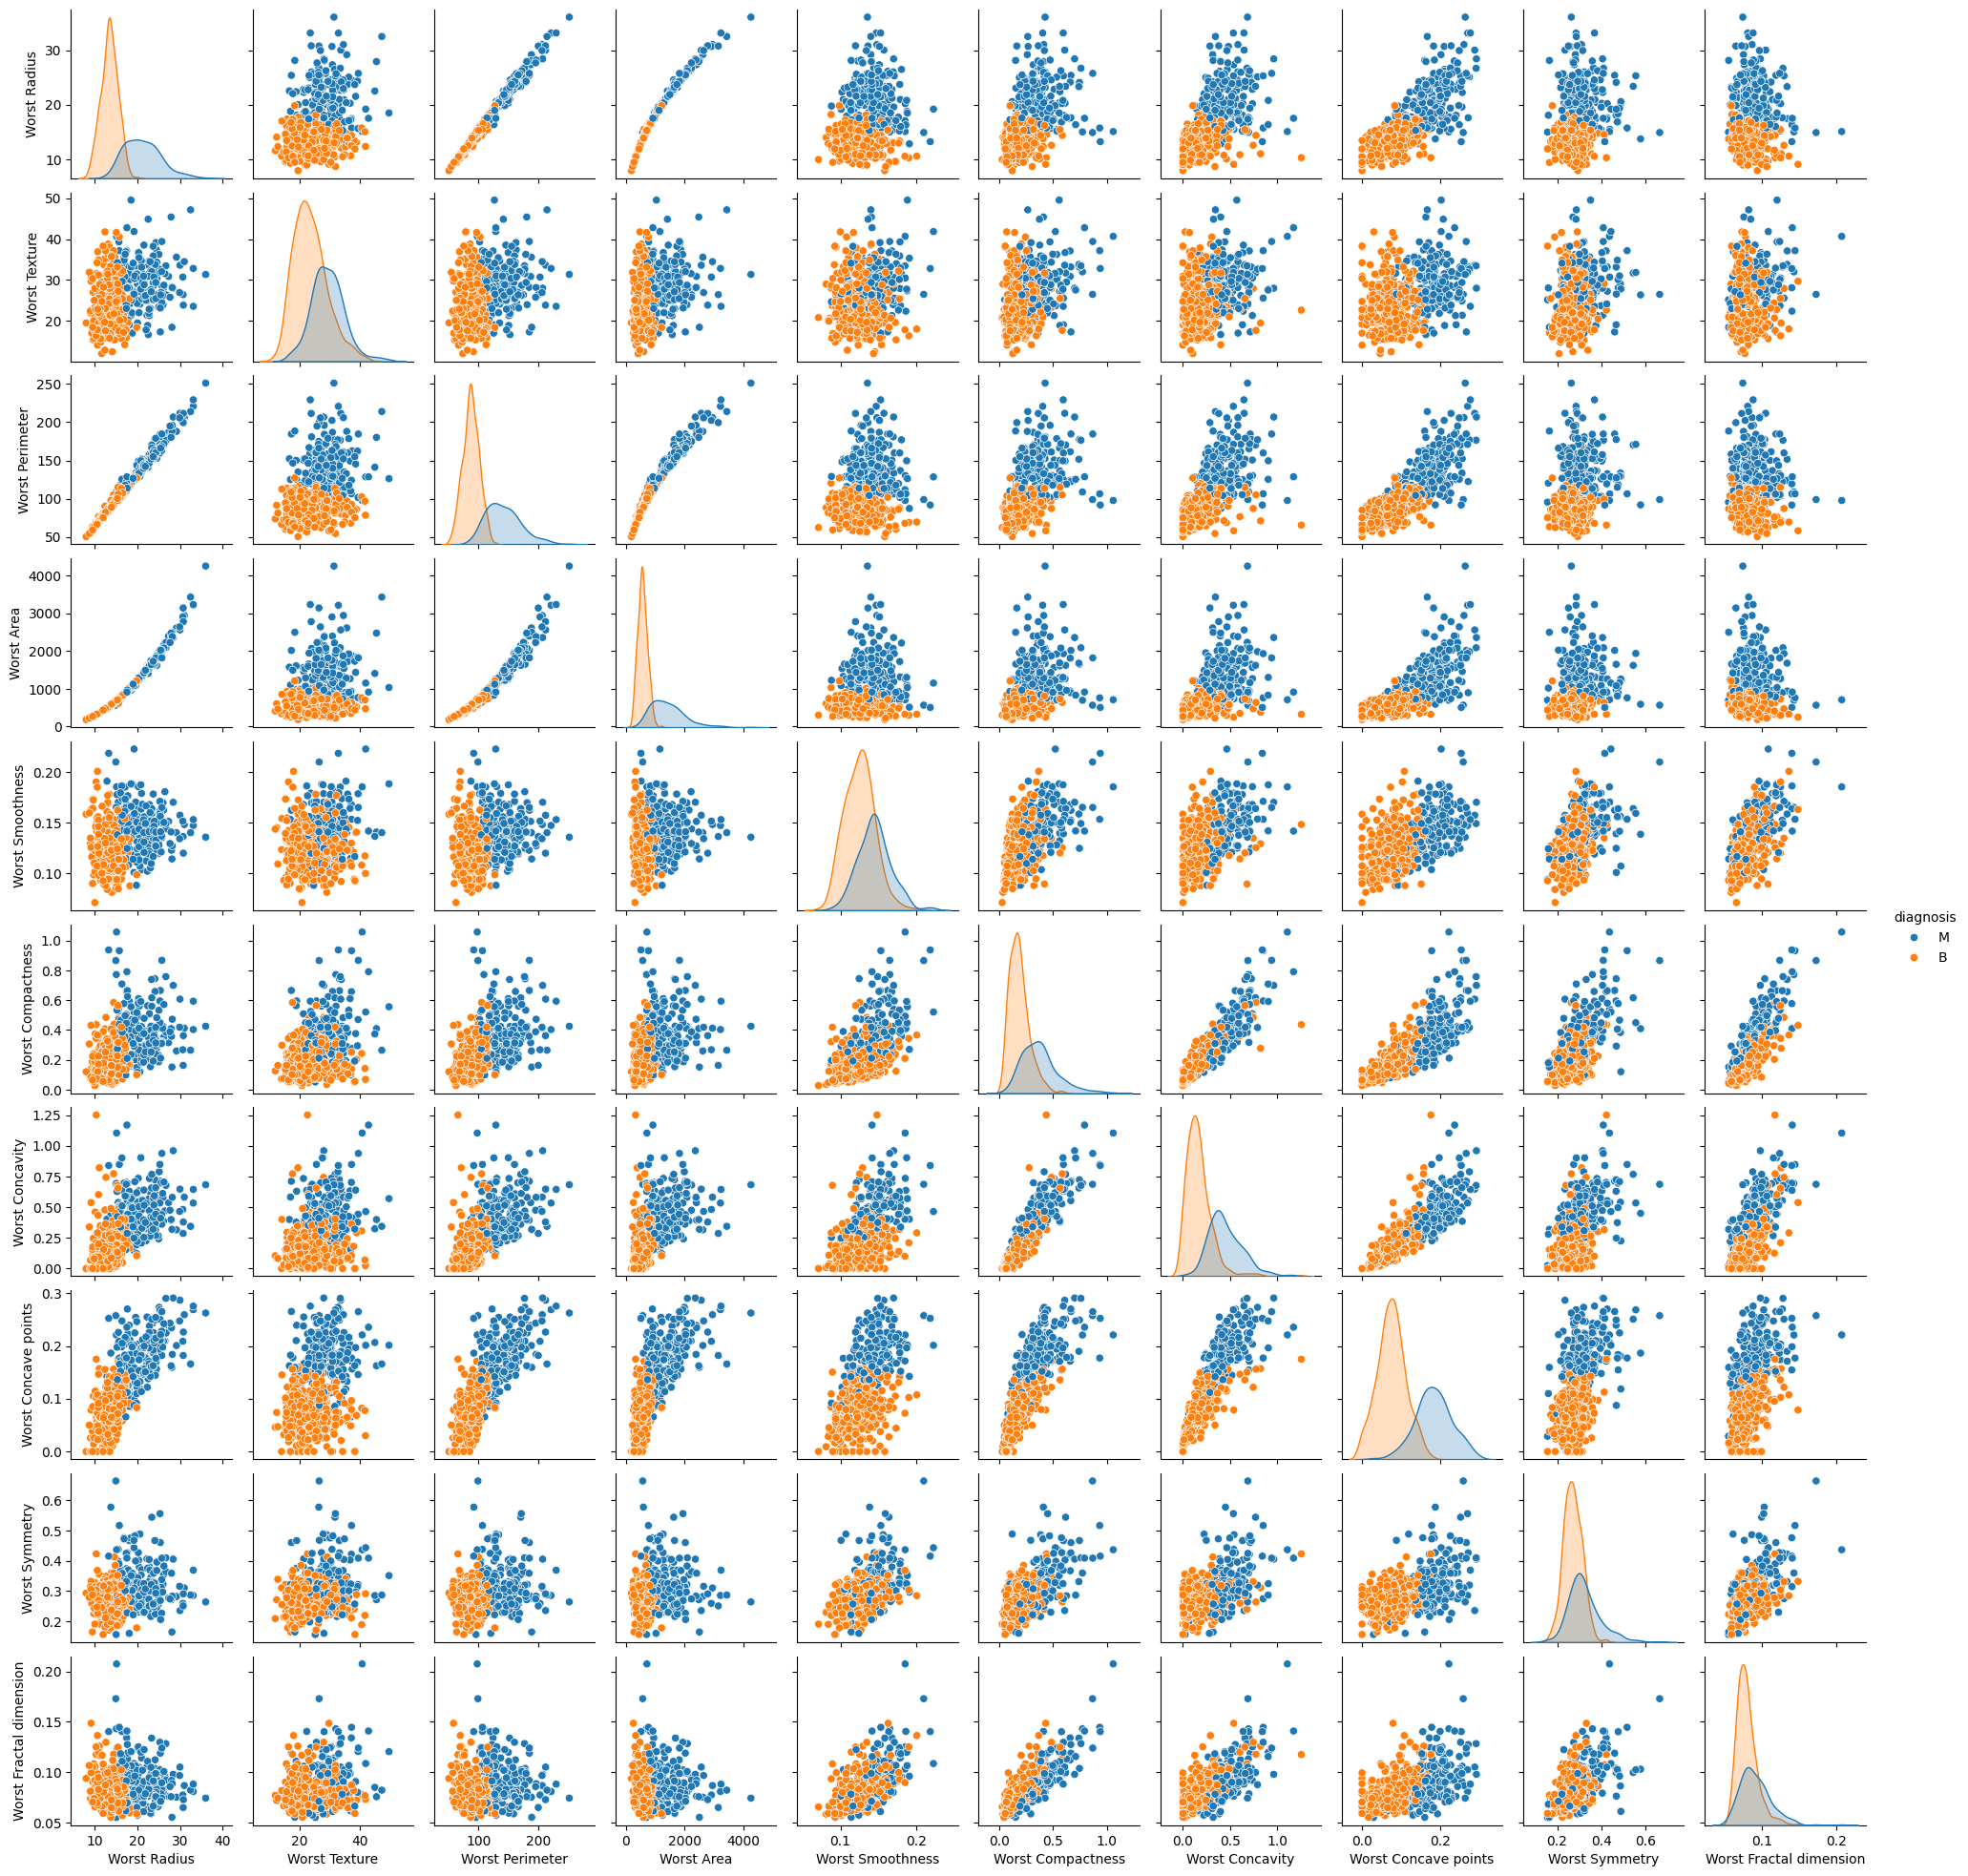

In [9]:
seaborn.pairplot(dataset[[dataset.columns[1]] + list(dataset.columns[22:])], hue='diagnosis', height=2)
plt.show()

По анализу изображений видно, что
1. Нет признака, который отделяет два класса друг от друга.
1. На большинстве картинок можно провести линию, которая будет разделять два класса друг от друга. Но при этом всегда есть точки, которые будут "выпадать" из класса.
1. Есть линейно зависимые признаки: средний радиус и средний периметр. Данное наблюдение имеет физический смысл: если опухоль имеет округлую форму, то длина окружности $L$ линейно зависит от радиуса $R$: $L = 2 \pi R$.
1. Средняя площадь квадратично зависит от среднего радиуса. Данное наблюдение тоже физическое обоснование: если опухоль имеет округлую форму, то её площадь $S$ пропорциональна квадрату радиуса $R$: $S = \pi R^2$.
1. Аналогичные зависимости между радиусом и периметром, и площадью и радиусом наблюдаются для наихудших значений, но при этом не наблюдаются для стандартных ошибок.

Линейная зависимость между средним радиусом и средним периметром

a = 1.0950 sig_a = 0.0030
b = -0.0278 sig_b = 0.0015 



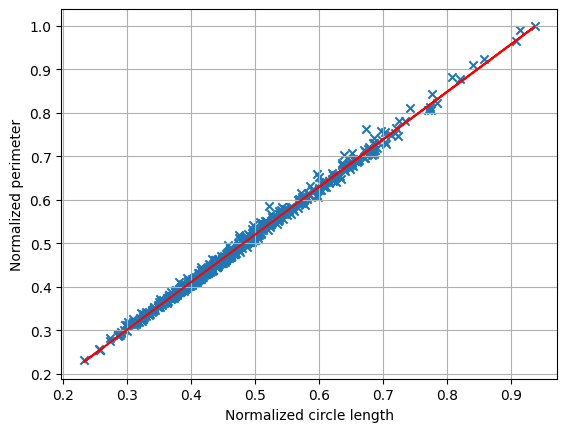

In [10]:
m_radius_name = GetFeatureName(Features.Radius, Features.TypeMean)
m_perimeter_name = GetFeatureName(Features.Perimeter, Features.TypeMean)
m_radius = dataset[m_radius_name]
m_perimeter = dataset[m_perimeter_name]

norm_value = max(m_perimeter)
m_n_circle_len = m_radius * 2 * math.pi / norm_value
m_n_perimeter = m_perimeter / norm_value

coefs, cov = curve_fit(Line, m_n_circle_len, m_n_perimeter)
errs = CalcErrors(coefs, cov)

plt.scatter(m_n_circle_len, m_n_perimeter, marker = 'x')
plt.plot(m_n_circle_len, Line(m_n_circle_len, *coefs), color = 'r')
plt.xlabel("Normalized circle length")
plt.ylabel("Normalized perimeter")
plt.grid()

Коэффициент наклона прямой $\approx 1,1$, то есть можно предположить, что опухли в среднем имеет круглую форму.

Линейная зависимость между средней площадью и квадратом среднего радиуса

a = 0.9942 sig_a = 0.0017
b = -0.0029 sig_b = 0.0005 



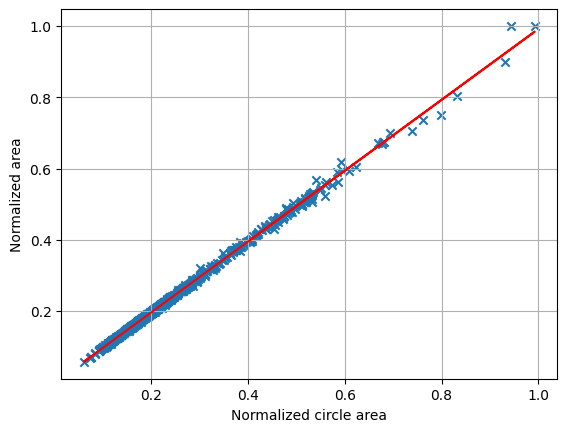

In [11]:
m_radius_name = GetFeatureName(Features.Radius, Features.TypeMean)
m_area_name = GetFeatureName(Features.Area, Features.TypeMean)
m_area = dataset[m_area_name]

norm_value = max(m_area)
m_n_circle_area = numpy.square(dataset[m_radius_name]) * math.pi / norm_value
m_n_area = m_area / norm_value

coefs, cov = curve_fit(Line, m_n_circle_area, m_n_area)
errs = CalcErrors(coefs, cov)

plt.scatter(m_n_circle_area, m_n_area, marker = 'x')
plt.plot(m_n_circle_area, Line(m_n_circle_area, *coefs), color = 'r')
plt.xlabel("Normalized circle area")
plt.ylabel("Normalized area")
plt.grid()

## Предобработка данных

Для увеличения эффективности работы со строковыми ответами закодируем их числами (числа сравнить быстрее, чем строки):
B = -1, M = 1.

Для увеличения устойчивости численных алгоритмов выполним нормировку всех признаков до значений от 0 до 1.

Идентификаторы в дальнейшем не интересны, выбросим их.

In [12]:
dataColumns = {}

# Кодируем диагноз
dataColumns["diagnosis"] = numpy.zeros(len(dataset))
for idx in range(0, len(dataset["diagnosis"])):
    if (dataset["diagnosis"][idx] == "B"):
        dataColumns["diagnosis"][idx] = -1
    else:
        dataColumns["diagnosis"][idx] = 1

# Нормируем признаки
for feature in ArrayOfFeatures:
    column = dataset[feature]
    maxV = max(column)
    minV = min(column)
    dataColumns[feature] = (column - minV) / (maxV - minV)
    
# Новый pandas DataFrame
procDataSet = pandas.DataFrame(dataColumns)
procDataSet.sample(5)

diagnosis  Mean Radius  Mean Texture  Mean Perimeter  Mean Area  \
158       -1.0     0.240381      0.102469        0.228388   0.129417   
484       -1.0     0.414075      0.053094        0.407781   0.256076   
144       -1.0     0.178380      0.177883        0.169097   0.089841   
544       -1.0     0.326045      0.371660        0.317739   0.187190   
518       -1.0     0.279190      0.287792        0.280976   0.148293   

     Mean Smoothness  Mean Compactness  Mean Concavity  Mean Concave points  \
158         0.365442          0.101313        0.046204             0.097565   
484         0.466462          0.338998        0.279053             0.308698   
144         0.228401          0.098184        0.052741             0.039140   
544         0.389546          0.252807        0.086410             0.117744   
518         0.624447          0.450034        0.113051             0.263569   

     Mean Symmetry  ...  Worst Radius  Worst Texture  Worst Perimeter  \
158       0.267677  ...      0.185343       0.170309         0.167688   
484       0.365657  ...      0.323017       0.058102         0.309229   
144       0.171212  ...      0.143010       0.231876         0.136361   
544       0.282828  ...      0.253291       0.339286         0.242841   
518       0.327778  ...      0.253291       0.329158         0.243538   

     Worst Area  Worst Smoothness  Worst Compactness  Worst Concavity  \
158    0.085431          0.371987           0.093052         0.068978   
484    0.164447          0.547646           0.262547         0.319808   
144    0.062918          0.240573           0.092179         0.077915   
544    0.123722          0.364723           0.171154         0.109984   
518    0.120306          0.491514           0.260801         0.099521   

     Worst Concave points  Worst Symmetry  Worst Fractal dimension  
158              0.241409        0.187069                 0.157025  
484              0.498969        0.195545                 0.175587  
144              0.117285        0.144885                 0.082973  
544              0.235223        0.134831                 0.195986  
518              0.376632        0.200473                 0.222288  

[5 rows x 31 columns]

### Уменьшение датасета

Для начала рассмотрим только средние значения признаков. Так как из интуитивных соображений, наибольшее значение и среднеквадратичное отклонение должны слабее влиять на результат классификации, чем среднее значение.

Исключим из датасета функционально зависимые признаки, то есть оставим средний радиус, а среднюю площадь и периметр исключим.

In [13]:
smallMeanDataset = procDataSet[list(procDataSet.columns[0:3]) + list(procDataSet.columns[5:11])]
smallMeanDataset.head(5)

diagnosis  Mean Radius  Mean Texture  Mean Smoothness  Mean Compactness  \
0        1.0     0.521037      0.022658         0.593753          0.792037   
1        1.0     0.643144      0.272574         0.289880          0.181768   
2        1.0     0.601496      0.390260         0.514309          0.431017   
3        1.0     0.210090      0.360839         0.811321          0.811361   
4        1.0     0.629893      0.156578         0.430351          0.347893   

   Mean Concavity  Mean Concave points  Mean Symmetry  Mean Fractal dimension  
0        0.703140             0.731113       0.686364                0.605518  
1        0.203608             0.348757       0.379798                0.141323  
2        0.462512             0.635686       0.509596                0.211247  
3        0.565604             0.522863       0.776263                1.000000  
4        0.463918             0.518390       0.378283                0.186816

In [14]:
smallMeanX = (smallMeanDataset[smallMeanDataset.columns[1:]]).to_numpy()
smallMeanY = smallMeanDataset["diagnosis"].to_numpy()
smallMeanFeatures = numpy.array([Features.Radius, Features.Texture, Features.Smoothness, Features.Compactness,
    Features.Concavity, Features.ConcavePoints, Features.Symmetry, Features.FractalDimension])

Выборка для отладки моделей:

In [15]:
debugX = None
debugY = None

# Извлекаем случайным образом примерно 10 элементов.
skfold = sklearn.model_selection.StratifiedKFold(n_splits = 50, shuffle = True, random_state = GetRandomSeed())
for train_index, validate_index in skfold.split(smallMeanX, smallMeanY):
    debugX = smallMeanX[validate_index]
    debugY = smallMeanY[validate_index]
    break

print(debugY)
print(debugX)

[ 1. -1.  1.  1. -1. -1.  1. -1. -1.  1. -1. -1.]
[[0.60717497 0.42069665 0.41238603 0.25556714 0.34653233 0.47206759
  0.26363636 0.08403538]
 [0.0575039  0.24112276 0.30125485 0.12284522 0.03720712 0.02940855
  0.35808081 0.3173968 ]
 [0.57877798 0.299628   0.47548975 0.32918226 0.30998126 0.44701789
  0.43282828 0.20324347]
 [0.43016707 0.3361515  0.35253227 0.19894485 0.22888941 0.32992048
  0.37272727 0.08319292]
 [0.09318946 0.20459926 0.37907376 0.32182075 0.21703374 0.11471173
  0.12373737 0.4564027 ]
 [0.20961711 0.03753805 0.37103909 0.14560456 0.08228679 0.13036779
  0.30656566 0.23525695]
 [0.49595343 1.         0.41067076 0.33869088 0.33200562 0.43792247
  0.37828283 0.20429655]
 [0.32036537 0.47548191 0.25097048 0.14934667 0.11005155 0.11650099
  0.36010101 0.09119629]
 [0.22381561 0.19411566 0.56305859 0.16388565 0.09386129 0.16153082
  0.47929293 0.31802864]
 [0.52293057 0.24146094 0.33258102 0.31844672 0.25538894 0.31083499
  0.33333333 0.16512216]
 [0.23138814 0.40006

# Реализация моделей

## k-ближайших соседей.

По графическому анализу выборки видно, что классы компактны (точки одного класса расположены рядом) и непрерывны (точки одного класса образуют связную область). Поэтому метод k-ближайших соседей можно применять.

В учебных целях я реализовал методы самостоятельно, чтобы лучше в них разобраться.

In [16]:
class ModelBase(object):
    """
    Базовый класс модели.
    """

    def __init__(self, **params):
        self.print_progress = params.get("print_progress", False)
    
    def Train(self, X, Y):
        # X - матрица l на n объектов-признаков:
        # l = число объектов = число строк.
        # n = число признаков = число столбцов.
        
        # Y - вектор ответов.
        raise NotImplementedError()

    def predict(self, new_x):
        # Alias for mlxtend.plotting.plot_decision_regions
        res_y = []
        if (self.print_progress):
            print("Размер задачи:", len(new_x))

        progress = 0
        every_amount_percent = 5
        progress_const = 100 / every_amount_percent

        for idx in range(0, len(new_x)):
            new_progress = int(idx * progress_const / len(new_x)) % progress_const
            if (self.print_progress and new_progress > progress):
                progress = new_progress
                print(f"Progress: {progress * every_amount_percent:.1f}%")
            
            res_y.append(self.Predict(new_x[idx]))

        return res_y

    def Predict(self, new_x):
        raise NotImplementedError()

    def GetModelName():
        return "Базовый класс для модели"

    def TestOnDataset(self, X_test, Y_test):
        assert(len(X_test) == len(Y_test))
        # Проверить, насколько модель точно предсказывает ответы на выборке.
        # Возвращает долю удачно предсказанных ответов (от 0 до 1).
        accuracy = 0
        for idx in range(0, len(X_test)):
            pred = self.Predict(X_test[idx])
            if (pred == Y_test[idx]):
                accuracy += 1
        accuracy /= len(X_test)
        return accuracy

In [17]:
class TrainOptimizeAndTestModel(object):
    """
    Класс для облегчения обучения, оптимизации параметров поиском по сетке, и тестирования моделей.
    """

    def __init__(self, modelType, X, Y, defaultModelParams = None, test_size = 0.3):
        self.test_size = test_size
        self.modelType = modelType
        self.defaultModelParams = defaultModelParams

        self.X_train, self.X_test, self.Y_train, self.Y_test = sklearn.model_selection.train_test_split(
            X, Y, test_size = self.test_size,
            random_state = GetRandomSeed(), # С каждым запуском случайное разбиение датасета.
            stratify = Y # Используем стратификацию. При разбиении датасета процентное соотношение классов будет таким же как и в исходном датасете. 
        )

    def Test(self, model):
        return model.TestOnDataset(self.X_test, self.Y_test)

    def TestReport(self, model):
        accuracy = model.TestOnDataset(self.X_test, self.Y_test)
        Report(self.Y_train, self.Y_test, accuracy)

    def SimpleTrainTest(self):
        # Обучение на всей обучающей выборке и проверка на тестовой выборке (без кросс-валидации).
        self.model = self.modelType(**self.defaultModelParams)
        self.model.Train(self.X_train, self.Y_train)
        return self.model.TestOnDataset(self.X_test, self.Y_test)

    def SimpleTrainTestReport(self):
        self.accuracy = self.SimpleTrainTest()
        self.Report(self.Y_train, self.Y_test, self.accuracy)

    def Report(self, X_train, X_test, accuracy):
        trainSize = len(X_train)
        testSize = len(X_test)
        totalSize = trainSize + testSize
        print(f"{self.modelType.GetModelName()}:")
        print(f"\tОбучающая выборка ({trainSize / totalSize * 100:.0f}%): {trainSize}.")
        print(f"\tВалидационная выборка ({testSize / totalSize * 100:.0f}%): {testSize}.")
        print(f"\tТочность: {accuracy * 100:.1f}%.")

    def TrainKFoldTest(self, foldsCount = 10, params = None):
        # Выборка разбивается на тестовую и обучающую.
        # Обучающая выборка в свою очередь разбивается на k частей (fold).
        # Обучение происходит на k-1 части (новая обучающая выборка), а на оставшейся (валидационная выборка) проверяется качество модели.
        # В качестве итоговой модели выбирается та модель, которая показала наибольшее качество на отложенной части.
        # Полученная итоговая модель тестируется на ранее отложенной тестовой выборке, на которой определяется итоговое качество модели.
        # Все разбиения выполняются так, чтобы процентное соотношение классов (ответов) было одинаковым в разбиении и исходном датасете (stratified разбиение).

        # Почитать подробнее: https://education.yandex.ru/handbook/ml/article/kross-validaciya

        if (params is None):
            params = self.defaultModelParams

        skfold = sklearn.model_selection.StratifiedKFold(n_splits = foldsCount, shuffle = True, random_state = GetRandomSeed())

        models = []
        accuracies = []

        for train_index, validate_index in skfold.split(self.X_train, self.Y_train):
            X_train, Y_train = self.X_train[train_index], self.Y_train[train_index]
            X_validate, Y_validate = self.X_train[validate_index], self.Y_train[validate_index]

            model = self.modelType(**params)
            model.Train(X_train, Y_train)
            accuracy = model.TestOnDataset(X_validate, Y_validate)

            models.append(model)
            accuracies.append(accuracy)
        
        return {"models" : models, "accuracies" : accuracies}

    def TrainKFoldTestOpt(self, foldsCount = 10, params = None):
        # Тоже, что и TrainKFoldTest, но возвращает только наилучшую модель и её точность.
        if (params is None):
            params = self.defaultModelParams

        skfold = sklearn.model_selection.StratifiedKFold(n_splits = foldsCount, shuffle = True, random_state = GetRandomSeed())

        best_accuracy = 0
        best_model = None

        for train_index, validate_index in skfold.split(self.X_train, self.Y_train):
            X_train, Y_train = self.X_train[train_index], self.Y_train[train_index]
            X_validate, Y_validate = self.X_train[validate_index], self.Y_train[validate_index]

            model = self.modelType(**params)
            model.Train(X_train, Y_train)
            accuracy = model.TestOnDataset(X_validate, Y_validate)

            if (accuracy > best_accuracy):
                best_model = model
                best_accuracy = accuracy
        
        return (best_model, best_accuracy)

    def _calcGrid(params_dict):
        # Преобразовать рекурсивно сетку параметров: {"a" : [1, 2, 3], "b" : [10, 11]}
        # В массив словарей: [{"a" : 1, "b" : 10}, {"a" : 1, "b" : 11}, {"a" : 2, "b" : 10} и т.д.]

        if (len(params_dict.keys()) == 1):
            key = next(iter(params_dict.keys()))
            params_grid = []
            for value in params_dict[key]:
                params_grid.append({key : value})
            return params_grid
        else:
            # Запоминаем текущие ключ-значение.
            key = next(iter(params_dict.keys()))
            values = params_dict[key]
            del params_dict[key]
            # Уменьшили размер словаря на 1. Рекурсивный вызов.
            params_grid_intermediate = TrainOptimizeAndTestModel._calcGrid(params_dict)
            # Добавляем запомненные значения к результату.
            params_grid_final = []
            for v in values:
                for d in params_grid_intermediate:
                    # Копируем словарь.
                    d_copy = d.copy()
                    # Добавляем к нему новый параметр.
                    d_copy[key] = v
                    # В params_grid_final добавляем изменённый словарь
                    params_grid_final.append(d_copy)
            return params_grid_final

    def GridSearchByGrid(self, params_grid, foldsCount = 10):
        res = []
        print("Progress: ", end='')

        for params in params_grid:
            print("#", end='')
            trainedModels = self.TrainKFoldTest(foldsCount = foldsCount, params = params)
            res.append({"params" : params, "kFoldModels" : trainedModels})
        
        print("")
        return res

    def GridSearch(self, params_dict, foldsCount = 10):
        # params_grid - словарь массивов перебираемых параметров.
        # Пример: {"a" : [1, 2, 3], "b" : [10, 11]}
        # Оптимизация будет проводиться по значениям:
        # a | b
        # 1 | 10
        # 1 | 11
        # 2 | 10
        # 2 | 11
        # 3 | 10
        # 3 | 11
        params_grid = TrainOptimizeAndTestModel._calcGrid(params_dict)
        return self.GridSearchByGrid(params_grid, foldsCount = foldsCount)

    def GridSearchOptByGrid(self, params_grid, foldsCount = 10):
        best_model = None
        best_params = None
        best_accuracy = 0
        print("Progress: ", end='')

        for params in params_grid:
            print("#", end='')
            model, accuracy = self.TrainKFoldTestOpt(foldsCount = foldsCount, params = params)
            if (accuracy > best_accuracy):
                best_model = model
                best_params = params
                best_accuracy = accuracy
                
        print("")
        return {"best_model" : best_model, "best_accuracy" : best_accuracy, "best_params" : best_params}

    def GridSearchOpt(self, params_dict, foldsCount = 10):
        # Тоже, что и GridSearch, только возвращает наилучшую модель и параметры.
        params_grid = TrainOptimizeAndTestModel._calcGrid(params_dict)
        return self.GridSearchOptByGrid(params_grid, foldsCount = foldsCount)

Тестируем TrainOptimizeAndTestModel._calcGrid()

In [18]:
print(TrainOptimizeAndTestModel._calcGrid({"a" : [1, 2, 3]}), end="\n\n")
print(TrainOptimizeAndTestModel._calcGrid({"a" : [1, 2, 3], "b" : [10, 11]}), end="\n\n")
print(TrainOptimizeAndTestModel._calcGrid({"a" : [1, 2, 3], "b" : [10, 11], "c" : [100, 101, 102]}), end="\n\n")
print(TrainOptimizeAndTestModel._calcGrid({"a" : [1, 2], "b" : [["a", "b"], ["c"], "d"]}), end="\n\n")
print(TrainOptimizeAndTestModel._calcGrid({"a" : [1, 2, 3], "b" : [10, 11], "c" : ['c'], "d" : ['d']}), end="\n\n")

[{'a': 1}, {'a': 2}, {'a': 3}]

[{'b': 10, 'a': 1}, {'b': 11, 'a': 1}, {'b': 10, 'a': 2}, {'b': 11, 'a': 2}, {'b': 10, 'a': 3}, {'b': 11, 'a': 3}]

[{'c': 100, 'b': 10, 'a': 1}, {'c': 101, 'b': 10, 'a': 1}, {'c': 102, 'b': 10, 'a': 1}, {'c': 100, 'b': 11, 'a': 1}, {'c': 101, 'b': 11, 'a': 1}, {'c': 102, 'b': 11, 'a': 1}, {'c': 100, 'b': 10, 'a': 2}, {'c': 101, 'b': 10, 'a': 2}, {'c': 102, 'b': 10, 'a': 2}, {'c': 100, 'b': 11, 'a': 2}, {'c': 101, 'b': 11, 'a': 2}, {'c': 102, 'b': 11, 'a': 2}, {'c': 100, 'b': 10, 'a': 3}, {'c': 101, 'b': 10, 'a': 3}, {'c': 102, 'b': 10, 'a': 3}, {'c': 100, 'b': 11, 'a': 3}, {'c': 101, 'b': 11, 'a': 3}, {'c': 102, 'b': 11, 'a': 3}]

[{'b': ['a', 'b'], 'a': 1}, {'b': ['c'], 'a': 1}, {'b': 'd', 'a': 1}, {'b': ['a', 'b'], 'a': 2}, {'b': ['c'], 'a': 2}, {'b': 'd', 'a': 2}]

[{'d': 'd', 'c': 'c', 'b': 10, 'a': 1}, {'d': 'd', 'c': 'c', 'b': 11, 'a': 1}, {'d': 'd', 'c': 'c', 'b': 10, 'a': 2}, {'d': 'd', 'c': 'c', 'b': 11, 'a': 2}, {'d': 'd', 'c': 'c', 'b': 10, '

In [19]:
class MetricBase(ModelBase):
    def __init__(self, **params):
        super(MetricBase, self).__init__(**params)
        # Параметры
        # weights_features - вектор весов признаков в метрике Миньковского. Значение по умолчанию - вектор единиц.
        
        # p - коэффициент метрики Миньковского. Значение по умолчанию 2 (Евклидова метрика).

        # Расстояние между точками определяется метрикой Миньковского:
        # rho(new_x, x_i) = ( \sum_{j = 1}^{n} ( w_j * |x^j - x^j_i|^p ) )^{1/p}

        if ("weights_features" in params):
            self.weights_features = params["weights_features"]
        else:
            self.weights_features = None

        if (not "p" in params):
            self.p = 2
        else:
            self.p = params["p"]
        

    def Train(self, X, Y):
        assert(len(X) == len(Y))
        # У ближайших соседей нет обучения - просто запоминается выборка.
        self.X = X
        self.Y = Y
        
        if (self.weights_features is None):
            self.weights_features = numpy.ones(len(self.X[0]))

        # Список возможных значений y.
        self.yValues = []
        for y in self.Y:
            if (not (y in self.yValues)):
                self.yValues.append(y)

    def Predict(self, new_x):
        raise NotImplementedError()
    
    def CalcRho(self, x, new_x):
        # Посчитать расстояние по метрике Миньковского:
        # rho(new_x, x_i) = ( \sum_{j = 1}^{n} ( w_j * |x^j - x^j_i|^p ) )^{1/p}

        deltaX = numpy.pow(numpy.abs(x - new_x), self.p)
        return math.pow(numpy.dot(self.weights_features, deltaX), 1/self.p)

    def CalcDistances(self, new_x):
        # Возвращает упорядоченный по возрастанию вектор пар: (расстояние от объекта x_i до new_x, класс объекта y_i).
        dist_ans = numpy.zeros(len(self.X), dtype=[("distance", float), ("class", float)])
        
        for idx in range(0, len(self.X)):
            x = self.X[idx]
            y = self.Y[idx]
            rho = self.CalcRho(x, new_x)
            dist_ans[idx] = (rho, y)

        return numpy.sort(dist_ans, axis = 0)

    def GetModelName():
        return "Базовый класс для метрических моделей"


class kNearestNeighbors(MetricBase):
    def __init__(self, **params):
        # weights_points - массив из k весов ближайших точек.
    
        super(kNearestNeighbors, self).__init__(**params)

        self.k = params["k"]

        if ("weights_points" in params):
            self.weights_points = params["weights_points"]
        else:
            self.weights_points = numpy.ones(self.k)

    def Predict(self, new_x):
        # Классификация по k ближайшим соседям.

        # new_x - классифицируемый объект.
        # k - количество учитываемых ближайших соседей.
        # weights_points - массив из k весов ближайших точек.
        # По умолчанию вектор из единиц.

        # Алгоритм: выберем k ближайших точек x к new_x.
        # Из этих точек рассмотрим множество точки P_j одного класса y_j.
        # Весом множества точек P_j будет сумма по всем точкам P_j весов этих точек weight_points:
        # classWeights[j] = sum_{p_j \in P} (weight_points[index_of(p_j)]). index_of(p_j) - индекс точки p_j в массиве k ближайших точек к new_x.

        dist_ans = self.CalcDistances(new_x)
        
        classWeights = numpy.zeros(len(self.yValues))

        for idx in range(self.k):
            dist = dist_ans[idx][0]
            ans = dist_ans[idx][1]
            
            yIdx = self.yValues.index(ans)
            classWeights[yIdx] += self.weights_points[idx]
        
        return self.yValues[numpy.argmax(classWeights)]

    def GetModelName():
        return "Модель k-ближайших соседей"

Выполним простую проверку корректности реализации. В качестве обучающей берём всю выборку, k = 1, а затем на ней тестируем. Не должно быть ошибок в предсказаниях (так как тестируемая точка есть в обучающей выборке).

In [20]:
kNearestNeighbors1 = kNearestNeighbors(k = 1)
kNearestNeighbors1.Train(smallMeanX, smallMeanY)
print("Точность:", kNearestNeighbors1.TestOnDataset(smallMeanX, smallMeanY))

Точность: 1.0


Метод k ближайших соседей не оптимизирован. Он для каждого предсказания вычисляет расстояния до всех точек в обучающей выборке. Поэтому построить картинку для больших размеров выборки затруднительно, так как plot_decision_regions вычисляет принадлежность классу для каждого пикселя. Ещё в этой функции не корректно обрабатывается значение класса -1, так как функция ожидает получить на вход классы 0, 1, 2, и т.д. Из-за этого область синего класса закрашивается белым.

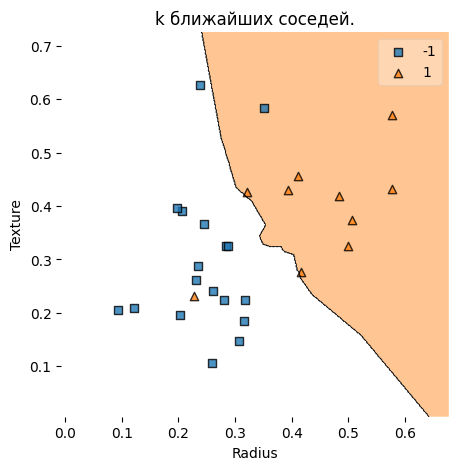

In [21]:
_y = smallMeanY.astype(int)
idx = [0, 1]
_x = smallMeanX[:, idx]
_f = smallMeanFeatures[idx]

_x1, tmp, _y1, tmp = sklearn.model_selection.train_test_split(
    _x, _y, train_size = 0.05,
    random_state = 123, # С каждым запуском случайное разбиение датасета.
    stratify = _y
)

model = kNearestNeighbors(k = 5, print_progress = False)
model.Train(_x1, _y1)

fig = plt.figure(figsize =(5, 5), dpi = 100)

mlxtend.plotting.plot_decision_regions(_x1, _y1, model, n_jobs=4, zoom_factor=10)

plt
plt.title("k ближайших соседей.")
plt.xlabel(_f[0])
plt.ylabel(_f[1])
plt.show()

Попробуем задать веса линейно убывающие от порядкового номера точки. Так как на картинке выше видно, что синяя точка попадает в оранжевую область

In [22]:
k = 5
numpy.arange(1, 0, -1/k)

array([1. , 0.8, 0.6, 0.4, 0.2])

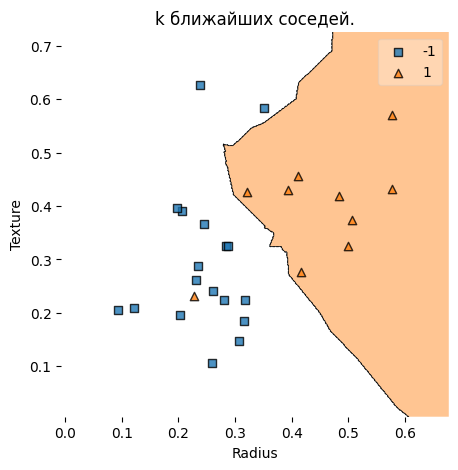

In [23]:
_y = smallMeanY.astype(int)
idx = [0, 1]
_x = smallMeanX[:, idx]
_f = smallMeanFeatures[idx]

_x1, tmp, _y1, tmp = sklearn.model_selection.train_test_split(
    _x, _y, train_size = 0.05,
    random_state = 123, # С каждым запуском случайное разбиение датасета.
    stratify = _y
)

k = 5
model = kNearestNeighbors(k = k, print_progress = False, weights_points = numpy.arange(1, 0, -1/k))
model.Train(_x1, _y1)

fig = plt.figure(figsize =(5, 5), dpi = 100)

mlxtend.plotting.plot_decision_regions(_x1, _y1, model, n_jobs=4, zoom_factor=10)

plt
plt.title("k ближайших соседей.")
plt.xlabel(_f[0])
plt.ylabel(_f[1])
plt.show()

Задали убывающие веса для точек и теперь синяя точка не находится в оранжевой области. Не имеет смысла пытаться придумать более сложную зависимость веса точки от расстояния, например экспоненциальную. Так как зависимость веса идёт от порядкового номера, но не расстояния. Зависимость от расстояния - это метод из другого варианта.

5 раз случайным образом разобьём датасет на обучающую (70%) и валидационную (30%) выборки для k = 5.

In [24]:
for i in range(5):
    helper = TrainOptimizeAndTestModel(kNearestNeighbors, smallMeanX, smallMeanY, {"k" : 5, "weights_points" : numpy.arange(1, 0, -1/5)})
    helper.SimpleTrainTestReport()

Модель k-ближайших соседей:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 95.3%.
Модель k-ближайших соседей:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 93.6%.
Модель k-ближайших соседей:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 94.2%.
Модель k-ближайших соседей:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 91.8%.
Модель k-ближайших соседей:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 92.4%.


По результатам моделирования видно, что качество модели зависит от выбора обучающей выборки. Поэтому при подборе гиперпараметров методом поиска по сетке для каждого узла сетки будем случайным образом выбирать обучающую выборку (Fold) несколько раз.

### Выполним подбор гиперпараметра k (количество ближайших соседей)

Разобьем выборку на обучающую (70%) и валидационную (30%).

По валидационной выборке определим итоговое качество модели.

На обучающей выборке с помощью поиска по сетке подберём гиперпараметр k. Для каждого узла сетки применим метод nFold: разобьём тестовую выборку на n частей (fold), одну часть отложим для валидации и определения качества обучения на оставшихся n-1 частей. Итоговой моделью в методе nFold будет та, которая покажет наилучшее качество на валидационной метрике. Качество - это процент правильных предсказаний. Далее выберем модель, которая показывает наилучшее качество для всех узлов сетки. И повторим этот процесс 5 раз.

In [25]:
sum_accuracy = 0
sum_k = 0
itersCount = 5
for i in range(itersCount):
    helper = TrainOptimizeAndTestModel(kNearestNeighbors, smallMeanX, smallMeanY)

    ks = numpy.arange(1, 10)
    print(f"Попытка {i + 1}. Оптимизируем по k в {ks}")

    paramsGrid = []
    for k in ks:
        paramsGrid.append({
            "k" : k,
            "weights_points" : numpy.arange(1, 0, -1/k)
        })

    res = helper.GridSearchOptByGrid(paramsGrid)

    print("Точность на валидационной (при использовании kFold) выборке:", res["best_accuracy"])
    accuracy = helper.Test(res["best_model"])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    print("Наилучший k:", res["best_params"])
    sum_accuracy += accuracy
    sum_k += res["best_params"]["k"]

print("\nСредняя точность:", sum_accuracy / itersCount)
print("\nСреднее k:", sum_k / itersCount)

Попытка 1. Оптимизируем по k в [1 2 3 4 5 6 7 8 9]
Progress: #########
Точность на валидационной (при использовании kFold) выборке: 1.0
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9532163742690059
Наилучший k: {'k': np.int64(9), 'weights_points': array([1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
       0.44444444, 0.33333333, 0.22222222, 0.11111111])}
Попытка 2. Оптимизируем по k в [1 2 3 4 5 6 7 8 9]
Progress: #########
Точность на валидационной (при использовании kFold) выборке: 1.0
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9415204678362573
Наилучший k: {'k': np.int64(3), 'weights_points': array([1.        , 0.66666667, 0.33333333])}
Попытка 3. Оптимизируем по k в [1 2 3 4 5 6 7 8 9]
Progress: #########
Точность на валидационной (при использовании kFold) выборке: 1.0
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9005847953216374
Наилучший k: {'k': np.int64(1), 'weigh

Видно, что в каждой попытке наилучший гиперпараметр k, вычисленный по узлам сетки разный. Это может быть из-за зависимости обучения от выборки. Так как модель почти не учитывает взаимное расположение точек: веса убывают линейно от порядкового номера, но не расстояния до точки, то удачное разбиение выборки на тестовую и обучающую может иметь большое значение. Линейно убывающий с расстоянием - это уже другой метод (метод Парзеновского окна из другого варианта), поэтому в работе не рассматривается.

Тем не менее, среднее значение k равно 4.2. Тогда возьмём k = 4 для итоговой модели.

In [26]:
sum_accuracy = 0
itersCount = 10
foldsCount = 3

for i in range(itersCount):
    helper = TrainOptimizeAndTestModel(kNearestNeighbors, smallMeanX, smallMeanY, test_size = 0.3)
    print(f"Попытка {i + 1}.")

    res = helper.TrainKFoldTestOpt(foldsCount= foldsCount, params = {"k" : 4,  "weights_points" : numpy.arange(1, 0, -1/4)})
    print("Точность на валидационной (при использовании kFold) выборке:", res[1])
    accuracy = helper.Test(res[0])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    sum_accuracy += accuracy
    
print("\nСредняя точность:", sum_accuracy / itersCount)

Попытка 1.
Точность на валидационной (при использовании kFold) выборке: 0.9624060150375939
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.935672514619883
Попытка 2.
Точность на валидационной (при использовании kFold) выборке: 0.9473684210526315
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9298245614035088
Попытка 3.
Точность на валидационной (при использовании kFold) выборке: 0.9473684210526315
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.935672514619883
Попытка 4.
Точность на валидационной (при использовании kFold) выборке: 0.9699248120300752
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9532163742690059
Попытка 5.
Точность на валидационной (при использовании kFold) выборке: 0.9624060150375939
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9415204678362573
Попытка 6.
Точность на валидационной (при использовании kFold) выборке: 

Итоговый гиперпараметр k = 4. Веса точек линейно убывают от номера точки.

Итоговое качество модели - берём среднее значение, примерно 93%. Так как обучение происходит по статистическим данным, разбитым на выборки случайным образом, то качество является случайной величиной. То есть нет никаких гарантий, что на новых данных модель будет иметь качество лучше или хуже. Но так как предполагается, что данные имеют какую-то статистику, то точность модели должна в среднем сохраняться.

Итоговая модель - любая из обученных. Не имеет смысла брать с наилучшим качеством, иначе возможно переобучение.

## Перцептрон

Функции активации

In [27]:
def ActivatorHeaviside(x):
    return (x >= 0).astype(int)

def ActivatorSigmoid(x):
    return 1 / (1 + numpy.exp(-x))

def DerActivatorSigmoid(x):
    return numpy.exp(-x) / numpy.square(1 + numpy.exp(-x))

def ActivatorTanh(x):
    ep = numpy.exp(x)
    em = numpy.exp(-x)
    return (ep - em) / (ep + em)

def ActivatorReLu(x):
    return x * ActivatorHeaviside(x)

def DerActivatorReLu(x):
    return ActivatorHeaviside(x)

def ActivatorPReLu(x, alpha):
    # max(0, x) + alpha * min(0, x) ==
    # h * x + (1 - h) * alpha * x ==
    # (h + (1 - h) * alpha) * x
    h = ActivatorHeaviside(x)
    return (h + (1 - h) * alpha) * x

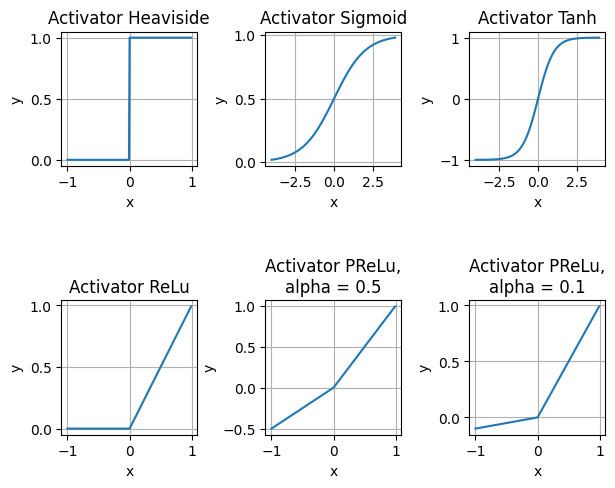

In [28]:
x = numpy.arange(-1, 1, 0.01)
x2 = numpy.arange(-4, 4, 0.1)
plt.figure()

plt.subplot(231)
plt.plot(x, ActivatorHeaviside(x))
plt.title("Activator Heaviside")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.subplot(232)
plt.plot(x2, ActivatorSigmoid(x2))
plt.title("Activator Sigmoid")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.subplot(233)
plt.plot(x2, ActivatorTanh(x2))
plt.title("Activator Tanh")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.subplot(234)
plt.plot(x, ActivatorReLu(x))
plt.title("Activator ReLu")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.subplot(235)
plt.plot(x, ActivatorPReLu(x, 0.5))
plt.title("Activator PReLu,\nalpha = 0.5")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.subplot(236)
plt.plot(x, ActivatorPReLu(x, 0.1))
plt.title("Activator PReLu,\nalpha = 0.1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=1,
                    wspace=0.5)

plt.show()

Функции потерь:

In [29]:
def LossSVM(margin):
    res = 1 - margin
    return res * ActivatorHeaviside(res)

def LossHebbs(margin):
    res = -margin
    return res * ActivatorHeaviside(res)

def LossLog(margin):
    return numpy.log2(1 + numpy.exp(-margin))

def LossSquare(margin):
    return numpy.square(1 - margin)

def LossSigmoid(margin):
    return 2 / (1 + numpy.exp(margin))

def LossExp(margin):
    return numpy.exp(-margin)

def LossHeaviside(margin):
    return (margin < 0).astype(int)

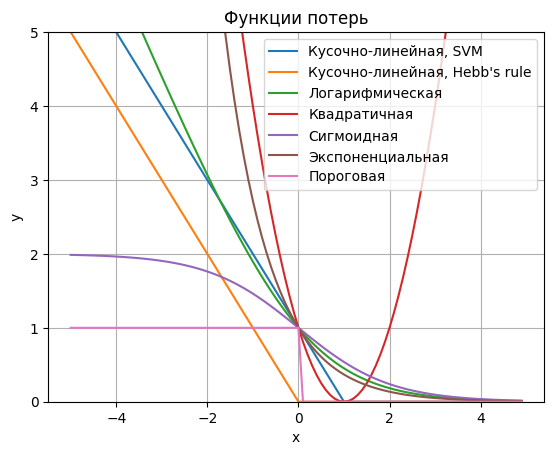

In [30]:
x = numpy.arange(-5, 5, 0.1)
plt.figure()

plt.plot(x, LossSVM(x), label="Кусочно-линейная, SVM")
plt.plot(x, LossHebbs(x), label="Кусочно-линейная, Hebb's rule")
plt.plot(x, LossLog(x), label="Логарифмическая")
plt.plot(x, LossSquare(x), label="Квадратичная")
plt.plot(x, LossSigmoid(x), label="Сигмоидная")
plt.plot(x, LossExp(x), label="Экспоненциальная")
plt.plot(x, LossHeaviside(x), label="Пороговая")


plt.title("Функции потерь")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([0, 5])
plt.legend()
plt.grid(True)

В перцептроне квадратичная функция потерь: \
$L(x, y) = \frac{1}{2} \sum_{i=1}^{M} (x_i^L - y_i)^2$ \
w - вектор матриц перехода перцептрона. \
$x^0$ - вектор признаков. \
$x^L$ - вектор предсказаний перцептрона. \
y - вектор правильных ответов.

In [31]:
class GradientDescentForFunction:
    def __init__(self, der_f, **params):
        # Минимизируем функцию funct.
        # Производная от функции (nabla funct).
        self.der_f = der_f
        # Скорость спуска.
        self.speed = params["speed"]

    def Optimize(self, x0, eps = 1e-3):
        while (True):
            x1 = x0 - self.speed * self.der_f(x0)
            if (abs(x1 - x0) < eps):
                return x1
            x0 = x1

In [32]:
def PerceptronLossFunction(y_pred, y_ans):
    return 0.5 * numpy.sum(numpy.square(y_pred - y_ans))

def PerceptronDerLossFunction(y_pred, y_ans):
    return y_pred - y_ans

def ConvertYToVector(y):
    # y in [-1, +1]
    if (y == -1):
        return numpy.array([1, 0])
    else:
        return numpy.array([0, 1])

In [33]:
def BackProp(der_loss_funct, p, y_pred, y_ans):
    # der_loss_funct - производная функции потерь. Функция потерь зависит от предсказываемого объекта L = L(x^L) 
    # p - перцептрон

    # Инициализация
    nablaL = []
    L = len(p.layers)

    # Производные по матрице перехода на последний слой.
    prev_dLoss_dx = der_loss_funct(y_pred, y_ans)
    # столбец на строку получим матрицу.
    column = (prev_dLoss_dx * p.layers[L - 1].dA_dM).reshape(-1, 1)
    row = p.layers[L - 1].prev_x.reshape(1, -1)
    nablaL.append(numpy.dot(column, row))

    # строка 
    prev_dLoss_dx = prev_dLoss_dx.reshape(1, -1)
    
    for l in range(len(p.layers) - 2, -1, -1):
        prev_layer = p.layers[l + 1]
        cur_layer = p.layers[l]
        
        # Удаляем узел -1.
        _W = prev_layer.W[:,1:]
        # строка
        cur_dLoss_dx = numpy.dot(prev_dLoss_dx * prev_layer.dA_dM, _W)

        # столбец на строку получим матрицу.
        column = (cur_dLoss_dx * cur_layer.dA_dM).reshape(-1, 1)
        row = cur_layer.prev_x.reshape(1, -1)
        nablaL = [numpy.dot(column, row)] + nablaL

        prev_dLoss_dx = cur_dLoss_dx

    # Матрицы идут с первого слоя к последнему.
    return numpy.array(nablaL, dtype=object)

In [34]:
class OptimizerPerceptronBase:
    def __init__(self, **params):
        if (not "eps" in params):
            self.eps = 1e-3
        else:
            self.eps = params["eps"]
        
    def Optimize(self, X, Y, eps = 1e-3):
        raise NotImplementedError()

class OptimizerPerceptronStochasticGradientDescent(OptimizerPerceptronBase):
    def __init__(self, **params):
        # Скорость спуска.
        self.speed = params["speed"]
        # 1/lambda ~ количество членов, по которым усредняем.
        self.lambd = params["lambd"]
        self.print_error = params.get("print_error", False)
        
        super(type(self), self).__init__(**params)

    def Optimize(self, p, X, Y):
        der_loss_funct = p.der_loss_funct
        loss_funct = p.loss_funct
        
        prev_empirical_risk = 0
        self.epochNumber = 1

        for idx in range(0, len(X)):
            y_pred = p.PredictVector(X[idx])
            prev_empirical_risk += loss_funct(y_pred, Y[idx])

        while (True):
            w0 = p.GetW()

            rnd_idx = random.randint(0, len(X) - 1)

            y_pred = p.PredictVector(X[rnd_idx])
            der_empirical_risk = BackProp(der_loss_funct, p, y_pred, ConvertYToVector(Y[rnd_idx]))

            w1 = w0 - self.speed * der_empirical_risk
            p.SetW(w1)

            cur_empirical_risk = (1 - self.lambd) * prev_empirical_risk + self.lambd * loss_funct(y_pred, Y[rnd_idx])
            error = abs(cur_empirical_risk - prev_empirical_risk) / min(abs(cur_empirical_risk), abs(prev_empirical_risk))
            
            if (self.print_error):
                print(f"{self.epochNumber}: Error = {error} < {self.eps}?")

            if (error < self.eps):
                return
            self.epochNumber += 1
            prev_empirical_risk = cur_empirical_risk

In [35]:
class Layer:
    def __init__(self, prev_dim, curr_dim, activator, der_activator):
        self.W = numpy.zeros(shape=(curr_dim, prev_dim + 1))
        self.activator = activator
        # Производная функции активации.
        self.der_activator = der_activator
        # Для ускорения вычисления производной функции потерь по матрицам перехода перцептрона, запоминаем margin и x на каждом слое.
        # x с -1.
        #self.x = numpy.zeros(curr_dim + 1)
        #self.dA_dM = numpy.zeros(curr_dim)

    def PredictVector(self, prev_x):
        # prev_x[0] == -1.
        # В prev_x есть -1. А в self.x нету.
        M = numpy.dot(self.W, prev_x)
        self.dA_dM = self.der_activator(M)
        self.x = numpy.array([-1] + list(self.activator(M)))
        self.prev_x = prev_x
        return self.x

class Perceptron(ModelBase):
    """
    Перцептрон
    """

    def __init__(self, **params):
        self.layers = params["layers"]
        self.optimizer = params["optimizer"]
        self.loss_funct = params["loss_funct"]
        self.der_loss_funct = params["der_loss_funct"]
    
    def Train(self, X, Y):
        # X - матрица l на n объектов-признаков:
        # l = число объектов = число строк.
        # n = число признаков = число столбцов.
        
        # Y - вектор ответов.
        self.optimizer.Optimize(self, X, Y)

    def GetW(self):
        res = []
        for layer in self.layers:
            res.append(layer.W)
        return numpy.array(res, dtype=object)

    def SetW(self, W):
        for idx in range(0, len(W)):
            self.layers[idx].W = W[idx].astype(float)

    def PredictVector(self, new_x):
        # new_x[0] != -1
        # Автоматические добавляем -1 к признакам по индексу 0.

        x = numpy.array([-1] + list(new_x))
        for layer in self.layers:
            x = layer.PredictVector(x)
        
        # Удаляем -1 по индексу 0.
        return numpy.delete(x, 0)  
    
    def Predict(self, new_x):
        # new_x[0] != -1
        # Автоматические добавляем -1 к признакам по индексу 0.

        x = numpy.array([-1] + list(new_x))
        for layer in self.layers:
            x = layer.PredictVector(x)
        
        # Удаляем -1 по индексу 0.
        x = numpy.delete(x, 0)
        return numpy.argmax(x) * 2 - 1

    def GetModelName():
        return "Базовый класс для модели"

### Отладка модели

In [36]:
featuresCount = len(debugX[0])

pr = Perceptron(**{
    "layers" : [
        Layer(featuresCount, featuresCount, ActivatorSigmoid, DerActivatorSigmoid),
        Layer(featuresCount, 2, ActivatorSigmoid, DerActivatorSigmoid)
    ],
    "optimizer" : OptimizerPerceptronStochasticGradientDescent(speed = 1, lambd = 1/4, print_error = True),
    "loss_funct" : PerceptronLossFunction,
    "der_loss_funct" : PerceptronDerLossFunction
})
pr.Train(debugX, debugY)

1: Error = 0.27699530516431925 < 0.001?
2: Error = 0.3247558119073698 < 0.001?
3: Error = 0.2407253563009026 < 0.001?
4: Error = 0.31939891985726854 < 0.001?
5: Error = 0.3154376892654999 < 0.001?
6: Error = 0.14786607578633254 < 0.001?
7: Error = 0.12566816180164478 < 0.001?
8: Error = 0.30234456264404413 < 0.001?
9: Error = 0.049472456677142305 < 0.001?
10: Error = 0.0379325130332157 < 0.001?
11: Error = 0.027583119546337635 < 0.001?
12: Error = 0.2831675876524196 < 0.001?
13: Error = 0.27593185339626985 < 0.001?
14: Error = 0.2637395696008752 < 0.001?
15: Error = 0.22144929728699425 < 0.001?
16: Error = 0.2614155329152476 < 0.001?
17: Error = 0.23647587528524314 < 0.001?
18: Error = 0.1424350297490497 < 0.001?
19: Error = 0.09516322207462147 < 0.001?
20: Error = 0.06760005557253011 < 0.001?
21: Error = 0.049756101184981964 < 0.001?
22: Error = 0.037486834365729325 < 0.001?
23: Error = 0.028728866941266126 < 0.001?
24: Error = 0.26720725694843656 < 0.001?
25: Error = 0.25916292399359

### Пробуем различные гиперпараметры.

Скорость спуска (константа пропорциональности градиенту) почти не влияет на скорость сходимости. Но влияет на точность. Скорее всего из-за того, что численный алгоритм не сходится. Наилучшая точность при $speed \in \{1, 10\}$.

In [37]:
featuresCount = len(smallMeanX[0])

speeds = [0.01, 0.1, 1, 10, 100]

for speed in speeds:
    print(f"Скорость спуска {speed}")
    helper = TrainOptimizeAndTestModel(Perceptron, smallMeanX, smallMeanY, {
        "layers" : [
            Layer(featuresCount, featuresCount, ActivatorSigmoid, DerActivatorSigmoid),
            Layer(featuresCount, 2, ActivatorSigmoid, DerActivatorSigmoid)
        ],
        "optimizer" : OptimizerPerceptronStochasticGradientDescent(speed=speed, lambd=1/200, 
            eps=1e-4, print_error = False),
        "loss_funct" : PerceptronLossFunction,
        "der_loss_funct" : PerceptronDerLossFunction
    })
    helper.SimpleTrainTestReport()
    print(f"Градиентный спуск за {helper.model.optimizer.epochNumber} итераций")

Скорость спуска 0.01
Базовый класс для модели:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 62.6%.
Градиентный спуск за 1323 итераций
Скорость спуска 0.1
Базовый класс для модели:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 62.6%.
Градиентный спуск за 1319 итераций
Скорость спуска 1
Базовый класс для модели:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 92.4%.
Градиентный спуск за 1296 итераций
Скорость спуска 10
Базовый класс для модели:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 86.5%.
Градиентный спуск за 1311 итераций
Скорость спуска 100
Базовый класс для модели:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 37.4%.
Градиентный спуск за 1322 итераций


#### 2 слоя, функция активации сигмоида.

Выполним подбор гиперпараметра лямбда по сетке. В модели используется метод стохастического градиента. 1/лямбда это примерно количество элементов, по которым происходит обучение.

In [38]:
sum_accuracy = 0
itersCount = 10
avg_part = 0
featuresCount = len(smallMeanX[0])

for i in range(itersCount):
    test_size = 0.3
    foldsCount = 5

    helper = TrainOptimizeAndTestModel(Perceptron, smallMeanX, smallMeanY, test_size = test_size)

    trainSize = len(smallMeanX) * (1 - test_size) * (foldsCount - 1) / foldsCount
    print(f"Размер всех fold'ов для обучения: {trainSize}")

    avg_count = numpy.arange(0.4, 1, 0.1)
    lambdas = 1 / (avg_count * trainSize)

    # Встраиваем сетку параметров в параметры модели.
    modelParamsGrid = []
    for lambd in lambdas:
        modelParamsGrid.append({
            "layers" : [
                Layer(featuresCount, featuresCount, ActivatorSigmoid, DerActivatorSigmoid),
                Layer(featuresCount, 2, ActivatorSigmoid, DerActivatorSigmoid)
            ],
            "optimizer" : OptimizerPerceptronStochasticGradientDescent(speed=1,
                 lambd=lambd, eps=1e-3, print_error = False),
            "loss_funct" : PerceptronLossFunction,
            "der_loss_funct" : PerceptronDerLossFunction
        })

    print(f"Попытка {i + 1}.")

    res = helper.GridSearchOptByGrid(modelParamsGrid, foldsCount = foldsCount)

    print("Точность на валидационной (при использовании kFold) выборке:", res["best_accuracy"])
    accuracy = helper.Test(res["best_model"])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    part = 1/res["best_params"]["optimizer"].lambd / trainSize
    print("Наилучшее количество членов для усреднения (1/lambd) в долях:", part)
    sum_accuracy += accuracy
    avg_part += part

print("\nСредняя точность:", sum_accuracy / itersCount)
print("\nСредняя доля:", avg_part / itersCount)

Размер всех fold'ов для обучения: 318.64
Попытка 1.
Progress: ######
Точность на валидационной (при использовании kFold) выборке: 0.975
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9005847953216374
Наилучшее количество членов для усреднения (1/lambd) в долях: 0.4
Размер всех fold'ов для обучения: 318.64
Попытка 2.
Progress: ######
Точность на валидационной (при использовании kFold) выборке: 0.9746835443037974
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9415204678362573
Наилучшее количество членов для усреднения (1/lambd) в долях: 0.6999999999999998
Размер всех fold'ов для обучения: 318.64
Попытка 3.
Progress: ######
Точность на валидационной (при использовании kFold) выборке: 0.975
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9415204678362573
Наилучшее количество членов для усреднения (1/lambd) в долях: 0.5
Размер всех fold'ов для обучения: 318.64
Попытка 4.
Progress: ######
Точность на 

Итого параметр лямбда нужно оценивать как 1 / (0.6 * размер обучающей выборки).

Выполним подбор гиперпараметра скорости спуска.

In [39]:
sum_accuracy = 0
itersCount = 10
avg_speed = 0
featuresCount = len(smallMeanX[0])

for i in range(itersCount):
    test_size = 0.3
    foldsCount = 3

    helper = TrainOptimizeAndTestModel(Perceptron, smallMeanX, smallMeanY, test_size = test_size)

    trainSize = len(smallMeanX) * (1 - test_size) * (foldsCount - 1) / foldsCount
    print(f"Размер всех fold'ов для обучения: {trainSize}")

    speeds = numpy.arange(1, 20, 2)
    lambd = 1 / (0.6 * trainSize)

    # Встраиваем сетку параметров в параметры модели.
    modelParamsGrid = []
    for speed in speeds:
        modelParamsGrid.append({
            "layers" : [
                Layer(featuresCount, featuresCount, ActivatorSigmoid, DerActivatorSigmoid),
                Layer(featuresCount, 2, ActivatorSigmoid, DerActivatorSigmoid)
            ],
            "optimizer" : OptimizerPerceptronStochasticGradientDescent(speed=speed,
                 lambd=lambd, eps=1e-3, print_error = False),
            "loss_funct" : PerceptronLossFunction,
            "der_loss_funct" : PerceptronDerLossFunction
        })

    print(f"Попытка {i + 1}.")

    res = helper.GridSearchOptByGrid(modelParamsGrid, foldsCount = foldsCount)

    print("Точность на валидационной (при использовании kFold) выборке:", res["best_accuracy"])
    accuracy = helper.Test(res["best_model"])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    avg_speed += res["best_params"]["optimizer"].speed
    print("Наилучшая скорость спуска:", res["best_params"]["optimizer"].speed)
    print("Количество итераций спуска:", res["best_params"]["optimizer"].epochNumber)
    sum_accuracy += accuracy

print("\nСредняя точность:", sum_accuracy / itersCount)
print("\nСредняя скорость спуска:", avg_speed / itersCount)

Размер всех fold'ов для обучения: 265.5333333333333
Попытка 1.
Progress: ##########
Точность на валидационной (при использовании kFold) выборке: 0.9624060150375939
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9181286549707602
Наилучшая скорость спуска: 11
Количество итераций спуска: 944
Размер всех fold'ов для обучения: 265.5333333333333
Попытка 2.
Progress: ##########
Точность на валидационной (при использовании kFold) выборке: 0.9624060150375939
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9298245614035088
Наилучшая скорость спуска: 5
Количество итераций спуска: 937
Размер всех fold'ов для обучения: 265.5333333333333
Попытка 3.
Progress: ##########
Точность на валидационной (при использовании kFold) выборке: 0.9699248120300752
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9181286549707602
Наилучшая скорость спуска: 13
Количество итераций спуска: 944
Размер всех fold'ов для обучения: 265.

Скорость спуска speed = 10.

Обучим итоговую модель двухслойной нейронной сети. Параметры стохастического градиентного спуска: скорость спуска 10, коэффициент усреднения лямбда = 1 / (0,6 * размер обучающей выборки). Итоговое качество около 93%.

In [40]:
sum_accuracy = 0
itersCount = 10
foldsCount = 5
testSize = 0.3
featuresCount = len(smallMeanX[0])

for i in range(itersCount):
    helper = TrainOptimizeAndTestModel(Perceptron, smallMeanX, smallMeanY, test_size = test_size)
    print(f"Попытка {i + 1}.")

    trainSize = len(smallMeanX) * (1 - test_size) * (foldsCount - 1) / foldsCount
    speed = 10
    lambd = 1 / (0.6 * trainSize)

    res = helper.TrainKFoldTestOpt(foldsCount= foldsCount, params = {
        "layers" : [
            Layer(featuresCount, featuresCount, ActivatorSigmoid, DerActivatorSigmoid),
            Layer(featuresCount, 2, ActivatorSigmoid, DerActivatorSigmoid)
        ],
        "optimizer" : OptimizerPerceptronStochasticGradientDescent(speed=speed, lambd=lambd, 
            eps=1e-4, print_error = False),
        "loss_funct" : PerceptronLossFunction,
        "der_loss_funct" : PerceptronDerLossFunction
    })
    print("Точность на валидационной (при использовании kFold) выборке:", res[1])
    accuracy = helper.Test(res[0])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    sum_accuracy += accuracy
    
print("\nСредняя точность:", sum_accuracy / itersCount)

Попытка 1.
Точность на валидационной (при использовании kFold) выборке: 0.9375
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.935672514619883
Попытка 2.
Точность на валидационной (при использовании kFold) выборке: 0.9746835443037974
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.935672514619883
Попытка 3.
Точность на валидационной (при использовании kFold) выборке: 0.9493670886075949
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9649122807017544
Попытка 4.
Точность на валидационной (при использовании kFold) выборке: 0.9367088607594937
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9122807017543859
Попытка 5.
Точность на валидационной (при использовании kFold) выборке: 0.9493670886075949
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9122807017543859
Попытка 6.
Точность на валидационной (при использовании kFold) выборке: 0.9746835443

Попробуем изменить количество слоев в перцептроне и функцию активации. И выполним подбор гиперпараметров.

#### 1 слой. Функция активации ReLu.

In [41]:
featuresCount = len(smallMeanX[0])

speeds = [0.01, 0.1, 1, 5, 10]

for speed in speeds:
    print(f"Скорость спуска {speed}")
    helper = TrainOptimizeAndTestModel(Perceptron, smallMeanX, smallMeanY, {
        "layers" : [
            Layer(featuresCount, 2, ActivatorReLu, DerActivatorReLu)
        ],
        "optimizer" : OptimizerPerceptronStochasticGradientDescent(speed=speed, lambd=1/200, 
            eps=1e-4, print_error = False),
        "loss_funct" : PerceptronLossFunction,
        "der_loss_funct" : PerceptronDerLossFunction
    })
    helper.SimpleTrainTestReport()
    print(f"Градиентный спуск за {helper.model.optimizer.epochNumber} итераций")

Скорость спуска 0.01
Базовый класс для модели:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 88.9%.
Градиентный спуск за 1226 итераций
Скорость спуска 0.1
Базовый класс для модели:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 93.0%.
Градиентный спуск за 1206 итераций
Скорость спуска 1
Базовый класс для модели:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 62.6%.
Градиентный спуск за 1972 итераций
Скорость спуска 5
Базовый класс для модели:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 62.6%.
Градиентный спуск за 1972 итераций
Скорость спуска 10
Базовый класс для модели:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 62.6%.
Градиентный спуск за 1972 итераций


In [42]:
sum_accuracy = 0
itersCount = 10
avg_speed = 0
featuresCount = len(smallMeanX[0])

for i in range(itersCount):
    test_size = 0.3
    foldsCount = 3

    helper = TrainOptimizeAndTestModel(Perceptron, smallMeanX, smallMeanY, test_size = test_size)

    trainSize = len(smallMeanX) * (1 - test_size) * (foldsCount - 1) / foldsCount
    print(f"Размер всех fold'ов для обучения: {trainSize}")

    speeds = [0.01, 0.02, 0.05, 0.08, 0.1, 0.12, 0.15, 0.2]
    lambd = 1 / (0.6 * trainSize)

    # Встраиваем сетку параметров в параметры модели.
    modelParamsGrid = []
    for speed in speeds:
        modelParamsGrid.append({
            "layers" : [
                Layer(featuresCount, 2, ActivatorReLu, DerActivatorReLu)
            ],
            "optimizer" : OptimizerPerceptronStochasticGradientDescent(speed=speed,
                 lambd=lambd, eps=1e-3, print_error = False),
            "loss_funct" : PerceptronLossFunction,
            "der_loss_funct" : PerceptronDerLossFunction
        })

    print(f"Попытка {i + 1}.")

    res = helper.GridSearchOptByGrid(modelParamsGrid, foldsCount = foldsCount)

    print("Точность на валидационной (при использовании kFold) выборке:", res["best_accuracy"])
    accuracy = helper.Test(res["best_model"])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    avg_speed += res["best_params"]["optimizer"].speed
    print("Наилучшая скорость спуска:", res["best_params"]["optimizer"].speed)
    print("Количество итераций спуска:", res["best_params"]["optimizer"].epochNumber)
    sum_accuracy += accuracy

print("\nСредняя точность:", sum_accuracy / itersCount)
print("\nСредняя скорость спуска:", avg_speed / itersCount)

Размер всех fold'ов для обучения: 265.5333333333333
Попытка 1.
Progress: ########
Точность на валидационной (при использовании kFold) выборке: 0.9696969696969697
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9473684210526315
Наилучшая скорость спуска: 0.08
Количество итераций спуска: 859
Размер всех fold'ов для обучения: 265.5333333333333
Попытка 2.
Progress: ########
Точность на валидационной (при использовании kFold) выборке: 0.9545454545454546
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9181286549707602
Наилучшая скорость спуска: 0.05
Количество итераций спуска: 882
Размер всех fold'ов для обучения: 265.5333333333333
Попытка 3.
Progress: ########
Точность на валидационной (при использовании kFold) выборке: 0.9545454545454546
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.8947368421052632
Наилучшая скорость спуска: 0.1
Количество итераций спуска: 870
Размер всех fold'ов для обучения: 265.

Средняя скорость спуска 0.1.

In [43]:
sum_accuracy = 0
itersCount = 10
avg_part = 0
featuresCount = len(smallMeanX[0])

for i in range(itersCount):
    test_size = 0.3
    foldsCount = 5

    helper = TrainOptimizeAndTestModel(Perceptron, smallMeanX, smallMeanY, test_size = test_size)

    trainSize = len(smallMeanX) * (1 - test_size) * (foldsCount - 1) / foldsCount
    print(f"Размер всех fold'ов для обучения: {trainSize}")

    avg_count = numpy.arange(0.4, 1, 0.1)
    lambdas = 1 / (avg_count * trainSize)

    # Встраиваем сетку параметров в параметры модели.
    modelParamsGrid = []
    for lambd in lambdas:
        modelParamsGrid.append({
            "layers" : [
                Layer(featuresCount, 2, ActivatorReLu, DerActivatorReLu)
            ],
            "optimizer" : OptimizerPerceptronStochasticGradientDescent(speed=0.1,
                 lambd=lambd, eps=1e-3, print_error = False),
            "loss_funct" : PerceptronLossFunction,
            "der_loss_funct" : PerceptronDerLossFunction
        })

    print(f"Попытка {i + 1}.")

    res = helper.GridSearchOptByGrid(modelParamsGrid, foldsCount = foldsCount)

    print("Точность на валидационной (при использовании kFold) выборке:", res["best_accuracy"])
    accuracy = helper.Test(res["best_model"])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    part = 1/res["best_params"]["optimizer"].lambd / trainSize
    print("Наилучшее количество членов для усреднения (1/lambd) в долях:", part)
    sum_accuracy += accuracy
    avg_part += part

print("\nСредняя точность:", sum_accuracy / itersCount)
print("\nСредняя доля:", avg_part / itersCount)

Размер всех fold'ов для обучения: 318.64
Попытка 1.
Progress: ######
Точность на валидационной (при использовании kFold) выборке: 0.9625
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9064327485380117
Наилучшее количество членов для усреднения (1/lambd) в долях: 0.6
Размер всех fold'ов для обучения: 318.64
Попытка 2.
Progress: ######
Точность на валидационной (при использовании kFold) выборке: 0.975
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9532163742690059
Наилучшее количество членов для усреднения (1/lambd) в долях: 0.5
Размер всех fold'ов для обучения: 318.64
Попытка 3.
Progress: ######
Точность на валидационной (при использовании kFold) выборке: 0.975
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9005847953216374
Наилучшее количество членов для усреднения (1/lambd) в долях: 0.4
Размер всех fold'ов для обучения: 318.64
Попытка 4.
Progress: ######
Точность на валидационной (при использо

Обучим итоговую модель нейронной сети c одним слоем, функция активации ReLu. Параметры стохастического градиентного спуска: скорость спуска 0.1, коэффициент усреднения лямбда = 1 / (0,6 * размер обучающей выборки). Итоговое качество около 93%. Качество 1 слоя с функции активации ReLu такое же, что и для 2 слоев с функцией активации сигмоида. Можно предположить, что это такая выборка (максимальное качество около 93%), и лучше не получится обучить модель из-за объектов-выбросов. А если пытаться подогнать качество на этой выборке, то получим переобучение модели. Поэтому дальше пытаться изменить параметры перцептрона не имеет смысла. 

In [44]:
sum_accuracy = 0
itersCount = 10
foldsCount = 5
testSize = 0.3
featuresCount = len(smallMeanX[0])

for i in range(itersCount):
    helper = TrainOptimizeAndTestModel(Perceptron, smallMeanX, smallMeanY, test_size = test_size)
    print(f"Попытка {i + 1}.")

    trainSize = len(smallMeanX) * (1 - test_size) * (foldsCount - 1) / foldsCount
    speed = 0.1
    lambd = 1 / (0.6 * trainSize)

    res = helper.TrainKFoldTestOpt(foldsCount= foldsCount, params = {
        "layers" : [
            Layer(featuresCount, 2, ActivatorReLu, DerActivatorReLu)
        ],
        "optimizer" : OptimizerPerceptronStochasticGradientDescent(speed=speed, lambd=lambd, 
            eps=1e-4, print_error = False),
        "loss_funct" : PerceptronLossFunction,
        "der_loss_funct" : PerceptronDerLossFunction
    })
    print("Точность на валидационной (при использовании kFold) выборке:", res[1])
    accuracy = helper.Test(res[0])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    sum_accuracy += accuracy
    
print("\nСредняя точность:", sum_accuracy / itersCount)

Попытка 1.
Точность на валидационной (при использовании kFold) выборке: 0.975
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9298245614035088
Попытка 2.
Точность на валидационной (при использовании kFold) выборке: 0.9620253164556962
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.935672514619883
Попытка 3.
Точность на валидационной (при использовании kFold) выборке: 0.9620253164556962
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.935672514619883
Попытка 4.
Точность на валидационной (при использовании kFold) выборке: 0.9873417721518988
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.935672514619883
Попытка 5.
Точность на валидационной (при использовании kFold) выборке: 0.9375
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.8947368421052632
Попытка 6.
Точность на валидационной (при использовании kFold) выборке: 0.95
Точность на тестовой 

## Метод опорных векторов (SVM)

In [45]:
class SVM(ModelBase):
    """
    Метод опорных векторов
    """

    def __init__(self, **params):
        """
        Решает задачу:
        1/2 ||w||^2 + C sum_i ksi_i -> min_{w, w_0, ksi}
        и
        1 - M_i - ksi_i <= 0
        и
        ksi_i >= 0

        где M_i = y_i (<x_i, w> - w_0) - отступ.

        Используются условия Каруша-Куна-Таккера, по ним строится двойственная задача:
        L(lambd) = - sum_i lambd_i + 1/2 sum_i sum_j lambd_i lambd_j y_i y_j <x_i, x_j> -> min_{lambd} (1)
        и
        sum lambd_i y_i = 0 (2)
        и
        0 <= lambd_i <= C (3)

        Условная задача поиска минимум (1) и (2) эквивалентна безусловной:
        L(lambd) = - sum_i lambd_i + 1/2 sum_i sum_j lambd_i lambd_j y_i y_j <x_i, x_j> + (sum lambd_i y_i)^2 -> min_{lambd}
        и
        0 <= lambd_i <= C

        Затем вектор коэффициентов w:
        w = sum lambd_i y_i x_i
        w_0 = <w, x_i> - y_i для любого i, M_i = 1 <=> 0 < lambd_i < C.
        """
        # Константа регуляризации.
        if ("C" in params):
            self.C = params["C"]
        else:
            self.C = 1
        # Скорость градиентного спуска.
        if ("speed" in params):
            self.speed = params["speed"]
        else:
            self.speed = 1
        # Относительная точность для градиентного спуска.
        # Если изменение вектора параметров или значения функционала меньше eps, то спуск прекращается.
        if ("eps" in params):
            self.eps = params["eps"]
        else:
            self.eps = 1e-3
        
        if ("max_epochs" in params):
            self.max_epochs = params["max_epochs"]
        else:
            self.max_epochs = 100

        # Отладка градиентного спуска.
        if ("debug_gd" in params):
            self.debug_gd = params["debug_gd"]
        else:
            self.debug_gd = False
        
        if ("print_lambds" in params):
            self.print_lambds = params["print_lambds"]
        else:
            self.print_lambds = False

    def Margin(self, x, y):
        return (numpy.dot(x, self.w) - self.w0) * y

    def LossFunction(self, x, y):
        return max(0, 1 - self.Margin(x, y))

    def Lagrangian(self, A, Y, lambds):
        # Минимизируемая функция Лагранжа.
        l_row = lambds.reshape((1, -1))
        l_column = lambds.reshape((-1, 1))
        return -numpy.sum(lambds) + 0.5 * numpy.dot(l_row, numpy.dot(A, l_column)) + (numpy.dot(lambds, Y))**2

    def DerLagrangian(self, A, A_diag, Y, lambds):
        # Вектор производных от функции Лагранжа. (nabla L).
        return -1 + lambds * A_diag + 0.5 * numpy.dot(A, lambds) + 2 * numpy.dot(Y, lambds) * Y

    def ClipLambds(self, lambds):
        # Ограничить вектор лямбд: 0 <= lambd_i <= C.
        return lambds * ActivatorHeaviside(lambds) * ActivatorHeaviside(self.C - lambds)

    def CalcErr(self, v1, v2):
        d = numpy.abs(v1 - v2)
        for i in range(0, len(d)):
            min_elem = min(v1[i], v2[i])
            d[i] /= abs(min_elem) + 1e-12
        return numpy.sum(d) / len(d)

    def GradientDescent(self, A, A_diag, Y):
        lambds0 = numpy.zeros(len(Y))
        L0 = self.Lagrangian(A, Y, lambds0)

        for epoch in range(0, self.max_epochs):
            nablaL = self.DerLagrangian(A, A_diag, Y, lambds0)
            lambds1 = self.ClipLambds(lambds0 - self.speed * nablaL)
            L1 = self.Lagrangian(A, Y, lambds1)

            if (self.debug_gd):
                print("l0", lambds0)
                print("l1", lambds1)
                print("nl", nablaL)

            # Относительная разность риска.
            if (abs((L1 - L0) / (min(L0, L1) + 1e-12)) < self.eps):
                return lambds1
            # Относительная разность векторов.
            if (self.CalcErr(lambds0, lambds1) < self.eps):
                return lambds1

            lambds0 = lambds1
            L0 = L1
        return lambds1

    def Train(self, X, Y):
        # X - матрица l на n объектов-признаков:
        # l = число объектов = число строк.
        # n = число признаков = число столбцов.
        
        # Y - вектор ответов.
        
        # A_ij = y_i y_j <x_i, x_j>
        A = numpy.zeros((len(X), len(X)))
        for i in range(0, len(X)):
            for j in range(i, len(X)):
                A[i][j] = A[j][i] = Y[i] * Y[j] * numpy.dot(X[i], X[j])
        A_diag = numpy.zeros(len(X))
        for i in range(0, len(X)):
            A_diag = A[i][i]

        lambds = self.GradientDescent(A, A_diag, Y)

        if (self.print_lambds):
            print("lambds:", lambds)

        self.w = numpy.dot((lambds * Y).reshape((1, -1)), X).reshape(-1)

        foundW0 = False
        for idx in range(0, len(X)):
            if (lambds[idx] > 0):
                self.w0 = numpy.dot(self.w, X[idx]) - Y[idx]
                foundW0 = True
                break
        if (not foundW0):
            print("""
                Модель обучилась не правильно.
                Все значения лямбда равны 0, что означает, что нет периферийных объектов,
                по которым проводится разделяющая плоскость.
                Попробуйте уменьшить скорость градиентного спуска speed или увеличить 
                константу регуляризации C.""")

    def Predict(self, new_x):
        sign = numpy.dot(new_x, self.w) - self.w0
        if (sign < 0):
            return -1
        else:
            return 1

    def GetModelName():
        return "Метод опорных векторов"

Отладка. Модель может обучиться не правильно (все лямбды 0). Чтобы исправить можно уменьшить скорость. Увеличение константы регуляризации тоже может помочь, тогда модель будет точнее разделять классы (ширина разделяющей полосы уменьшиться), но это может привести к переобучению.

In [46]:
svm = SVM(max_epochs = 200, speed=0.05, debug_gd = False, print_lambds = True, eps = 1e-6)
svm.Train(debugX, debugY)

lambds: [0.87106151 0.26803483 0.         0.28511031 0.39920849 0.46783209
 0.8884061  0.68048277 0.5268958  0.12175259 0.547991   0.3720784 ]


In [47]:
svm = SVM(max_epochs = 200, C = 10000, debug_gd = False, print_lambds = True)
svm.Train(debugX, debugY)

lambds: [-0.  0. -0. -0.  0.  0. -0.  0.  0. -0.  0.  0.]

                Модель обучилась не правильно.
                Все значения лямбда равны 0, что означает, что нет периферийных объектов,
                по которым проводится разделяющая плоскость.
                Попробуйте уменьшить скорость градиентного спуска speed или увеличить 
                константу регуляризации C.


Точность модели прыгает от 60 до 80%. Что говорит о том, что для удачно взятой выборки, модель хорошо предсказывает. Для неудачно взятой - плохо.

In [48]:
for i in range(0, 5):
    helper = TrainOptimizeAndTestModel(SVM, smallMeanX, smallMeanY, {"max_epochs" : 200, "speed" : 0.05})
    helper.SimpleTrainTestReport()

Метод опорных векторов:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 74.3%.
Метод опорных векторов:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 69.6%.
Метод опорных векторов:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 85.4%.
Метод опорных векторов:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 76.0%.
Метод опорных векторов:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 64.9%.


Уменьшили константу регуляризации, то есть увеличили ширину разделяющей классы полосы, точность возросла (было 60-80%, стало 80-90%), так как перестали учитывать точки-выбросы.

In [49]:
for i in range(0, 5):
    helper = TrainOptimizeAndTestModel(SVM, smallMeanX, smallMeanY, {"max_epochs" : 500, "speed" : 0.001, "C" : 0.1})
    helper.SimpleTrainTestReport()

Метод опорных векторов:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 91.2%.
Метод опорных векторов:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 89.5%.
Метод опорных векторов:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 86.5%.
Метод опорных векторов:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 84.2%.
Метод опорных векторов:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 79.5%.


А если ещё сильнее уменьшить регуляризатор, то точность уменьшится (было 80-90%, стало 30-60%).

In [50]:
for i in range(0, 5):
    helper = TrainOptimizeAndTestModel(SVM, smallMeanX, smallMeanY, {"max_epochs" : 500, "speed" : 0.001, "C" : 0.01})
    helper.SimpleTrainTestReport()

Метод опорных векторов:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 37.4%.
Метод опорных векторов:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 62.6%.
Метод опорных векторов:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 62.6%.
Метод опорных векторов:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 62.6%.
Метод опорных векторов:
	Обучающая выборка (70%): 398.
	Валидационная выборка (30%): 171.
	Точность: 37.4%.


### Подбор гиперпараметров

Гиперпараметры - скорость градиентного спуска и коэффициент регуляризации.

In [51]:
sum_accuracy = 0
itersCount = 10
avg_speed = 0
featuresCount = len(smallMeanX[0])

for i in range(itersCount):
    test_size = 0.3
    foldsCount = 5

    helper = TrainOptimizeAndTestModel(SVM, smallMeanX, smallMeanY, test_size = test_size)

    print(f"Попытка {i + 1}.")

    res = helper.GridSearchOpt({"max_epochs" : [500], "speed" : [1e-6, 1e-5, 1e-4, 1e-3], "C" : [0.1]}, foldsCount = foldsCount)

    print("Точность на валидационной (при использовании kFold) выборке:", res["best_accuracy"])
    accuracy = helper.Test(res["best_model"])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    speed = res["best_params"]["speed"]
    print("Наилучшая скорость:", speed)
    sum_accuracy += accuracy
    avg_speed += speed

print("\nСредняя точность:", sum_accuracy / itersCount)
print("\nСреднее значение параметра:", avg_speed / itersCount)

Попытка 1.
Progress: ####
Точность на валидационной (при использовании kFold) выборке: 0.9493670886075949
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.8654970760233918
Наилучшая скорость: 0.001
Попытка 2.
Progress: ####
Точность на валидационной (при использовании kFold) выборке: 0.9240506329113924
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.8362573099415205
Наилучшая скорость: 0.0001
Попытка 3.
Progress: ####
Точность на валидационной (при использовании kFold) выборке: 0.9125
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9064327485380117
Наилучшая скорость: 0.0001
Попытка 4.
Progress: ####
Точность на валидационной (при использовании kFold) выборке: 0.9625
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9298245614035088
Наилучшая скорость: 0.001
Попытка 5.
Progress: ####
Точность на валидационной (при использовании kFold) выборке: 0.95
Точность на тестовой (

Итоговый параметр скорости 0.001.

In [52]:
sum_accuracy = 0
itersCount = 10
avg_C = 0
featuresCount = len(smallMeanX[0])

for i in range(itersCount):
    test_size = 0.3
    foldsCount = 5

    helper = TrainOptimizeAndTestModel(SVM, smallMeanX, smallMeanY, test_size = test_size)

    print(f"Попытка {i + 1}.")

    res = helper.GridSearchOpt({"max_epochs" : [500], "speed" : [1e-3], "C" : [0.2, 0.15, 0.1, 0.05]}, foldsCount = foldsCount)

    print("Точность на валидационной (при использовании kFold) выборке:", res["best_accuracy"])
    accuracy = helper.Test(res["best_model"])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    C = res["best_params"]["C"]
    print("Наилучший коэффициент регуляризации:", C)
    sum_accuracy += accuracy
    avg_C += C

print("\nСредняя точность:", sum_accuracy / itersCount)
print("\nСреднее значение параметра:", avg_C / itersCount)

Попытка 1.
Progress: ####
Точность на валидационной (при использовании kFold) выборке: 0.9875
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9415204678362573
Наилучший коэффициент регуляризации: 0.15
Попытка 2.
Progress: ####
Точность на валидационной (при использовании kFold) выборке: 0.9875
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9473684210526315
Наилучший коэффициент регуляризации: 0.1
Попытка 3.
Progress: ####
Точность на валидационной (при использовании kFold) выборке: 0.9625
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9005847953216374
Наилучший коэффициент регуляризации: 0.2
Попытка 4.
Progress: ####
Точность на валидационной (при использовании kFold) выборке: 0.9375
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9532163742690059
Наилучший коэффициент регуляризации: 0.1
Попытка 5.
Progress: ####
Точность на валидационной (при использовании kFold) в

Средний параметр регуляризации 0.15.

Итоговая модель. speed = 1e-3. C = 0.15. Средняя точность 92%.

In [53]:
sum_accuracy = 0
itersCount = 10
foldsCount = 3
testSize = 0.3
featuresCount = len(smallMeanX[0])

for i in range(itersCount):
    helper = TrainOptimizeAndTestModel(SVM, smallMeanX, smallMeanY, test_size = test_size)
    print(f"Попытка {i + 1}.")

    res = helper.TrainKFoldTestOpt(foldsCount= foldsCount, params = {"speed" : 1e-3, "C" : 0.15})
    print("Точность на валидационной (при использовании kFold) выборке:", res[1])
    accuracy = helper.Test(res[0])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    sum_accuracy += accuracy
    
print("\nСредняя точность:", sum_accuracy / itersCount)

Попытка 1.
Точность на валидационной (при использовании kFold) выборке: 0.8872180451127819
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.8947368421052632
Попытка 2.
Точность на валидационной (при использовании kFold) выборке: 0.9318181818181818
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9239766081871345
Попытка 3.
Точность на валидационной (при использовании kFold) выборке: 0.9242424242424242
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.847953216374269
Попытка 4.
Точность на валидационной (при использовании kFold) выборке: 0.8646616541353384
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.8596491228070176
Попытка 5.
Точность на валидационной (при использовании kFold) выборке: 0.9166666666666666
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.8713450292397661
Попытка 6.
Точность на валидационной (при использовании kFold) выборке:

# Полный датасет

Ранее в датасете использовались только средние значения. Теперь попробуем обучить модели на всём датасете. Вдруг предположение о том, что вся информация находится в среднем значении не верна? А среднеквадратичное отклонение и наибольшее значение тоже несут информацию о классе. Не будем исключать функционально зависимые признаки. Вдруг, хотя и есть зависимость между признаками, но она выполняется в среднем, а отклонение от среднего значения содержит информацию о классе.

In [54]:
finalDataset = procDataSet
finalDataset.head(5)

diagnosis  Mean Radius  Mean Texture  Mean Perimeter  Mean Area  \
0        1.0     0.521037      0.022658        0.545989   0.363733   
1        1.0     0.643144      0.272574        0.615783   0.501591   
2        1.0     0.601496      0.390260        0.595743   0.449417   
3        1.0     0.210090      0.360839        0.233501   0.102906   
4        1.0     0.629893      0.156578        0.630986   0.489290   

   Mean Smoothness  Mean Compactness  Mean Concavity  Mean Concave points  \
0         0.593753          0.792037        0.703140             0.731113   
1         0.289880          0.181768        0.203608             0.348757   
2         0.514309          0.431017        0.462512             0.635686   
3         0.811321          0.811361        0.565604             0.522863   
4         0.430351          0.347893        0.463918             0.518390   

   Mean Symmetry  ...  Worst Radius  Worst Texture  Worst Perimeter  \
0       0.686364  ...      0.620776       0.141525         0.668310   
1       0.379798  ...      0.606901       0.303571         0.539818   
2       0.509596  ...      0.556386       0.360075         0.508442   
3       0.776263  ...      0.248310       0.385928         0.241347   
4       0.378283  ...      0.519744       0.123934         0.506948   

   Worst Area  Worst Smoothness  Worst Compactness  Worst Concavity  \
0    0.450698          0.601136           0.619292         0.568610   
1    0.435214          0.347553           0.154563         0.192971   
2    0.374508          0.483590           0.385375         0.359744   
3    0.094008          0.915472           0.814012         0.548642   
4    0.341575          0.437364           0.172415         0.319489   

   Worst Concave points  Worst Symmetry  Worst Fractal dimension  
0              0.912027        0.598462                 0.418864  
1              0.639175        0.233590                 0.222878  
2              0.835052        0.403706                 0.213433  
3              0.884880        1.000000                 0.773711  
4              0.558419        0.157500                 0.142595  

[5 rows x 31 columns]

In [55]:
finalX = (finalDataset[finalDataset.columns[1:]]).to_numpy()
finalY = finalDataset["diagnosis"].to_numpy()

### k соседей

Подбор гиперпараметров:

In [56]:
sum_accuracy = 0
sum_k = 0
itersCount = 10
for i in range(itersCount):
    helper = TrainOptimizeAndTestModel(kNearestNeighbors, finalX, finalY)

    ks = numpy.arange(2, 7)
    print(f"Попытка {i + 1}. Оптимизируем по k в {ks}")

    paramsGrid = []
    for k in ks:
        paramsGrid.append({
            "k" : k,
            "weights_points" : numpy.arange(1, 0, -1/k)
        })

    res = helper.GridSearchOptByGrid(paramsGrid, foldsCount = 4)

    print("Точность на валидационной (при использовании kFold) выборке:", res["best_accuracy"])
    accuracy = helper.Test(res["best_model"])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    print("Наилучший k:", res["best_params"])
    sum_accuracy += accuracy
    sum_k += res["best_params"]["k"]

print("\nСредняя точность:", sum_accuracy / itersCount)
print("\nСреднее k:", sum_k / itersCount)

Попытка 1. Оптимизируем по k в [2 3 4 5 6]
Progress: #####
Точность на валидационной (при использовании kFold) выборке: 1.0
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9590643274853801
Наилучший k: {'k': np.int64(3), 'weights_points': array([1.        , 0.66666667, 0.33333333])}
Попытка 2. Оптимизируем по k в [2 3 4 5 6]
Progress: #####
Точность на валидационной (при использовании kFold) выборке: 0.98
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9883040935672515
Наилучший k: {'k': np.int64(3), 'weights_points': array([1.        , 0.66666667, 0.33333333])}
Попытка 3. Оптимизируем по k в [2 3 4 5 6]
Progress: #####
Точность на валидационной (при использовании kFold) выборке: 0.98989898989899
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9707602339181286
Наилучший k: {'k': np.int64(4), 'weights_points': array([1.  , 0.75, 0.5 , 0.25])}
Попытка 4. Оптимизируем по k в [2 3 4 5 6]
Progress: ###

Обучение итоговой модели. k = 4

In [57]:
sum_accuracy = 0
itersCount = 10
foldsCount = 3

for i in range(itersCount):
    helper = TrainOptimizeAndTestModel(kNearestNeighbors, finalX, finalY, test_size = 0.3)
    print(f"Попытка {i + 1}.")

    res = helper.TrainKFoldTestOpt(foldsCount= foldsCount, params = {"k" : 4,  "weights_points" : numpy.arange(1, 0, -1/4)})
    print("Точность на валидационной (при использовании kFold) выборке:", res[1])
    accuracy = helper.Test(res[0])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    sum_accuracy += accuracy
    
print("\nСредняя точность:", sum_accuracy / itersCount)

Попытка 1.
Точность на валидационной (при использовании kFold) выборке: 0.9849624060150376
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9649122807017544
Попытка 2.
Точность на валидационной (при использовании kFold) выборке: 0.9774436090225563
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9590643274853801
Попытка 3.
Точность на валидационной (при использовании kFold) выборке: 0.9774436090225563
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9532163742690059
Попытка 4.
Точность на валидационной (при использовании kFold) выборке: 0.9545454545454546
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9707602339181286
Попытка 5.
Точность на валидационной (при использовании kFold) выборке: 0.9849624060150376
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9707602339181286
Попытка 6.
Точность на валидационной (при использовании kFold) выборке

### Перцептрон

2 слоя

Подбор гиперпараметров:

In [58]:
sum_accuracy = 0
itersCount = 10
avg_speed = 0
featuresCount = len(finalX[0])

for i in range(itersCount):
    test_size = 0.3
    foldsCount = 3

    helper = TrainOptimizeAndTestModel(Perceptron, finalX, finalY, test_size = test_size)

    trainSize = len(finalX) * (1 - test_size) * (foldsCount - 1) / foldsCount
    print(f"Размер всех fold'ов для обучения: {trainSize}")

    speeds = numpy.arange(1, 20, 2)
    lambd = 1 / (0.6 * trainSize)

    # Встраиваем сетку параметров в параметры модели.
    modelParamsGrid = []
    for speed in speeds:
        modelParamsGrid.append({
            "layers" : [
                Layer(featuresCount, featuresCount, ActivatorSigmoid, DerActivatorSigmoid),
                Layer(featuresCount, 2, ActivatorSigmoid, DerActivatorSigmoid)
            ],
            "optimizer" : OptimizerPerceptronStochasticGradientDescent(speed=speed,
                 lambd=lambd, eps=1e-3, print_error = False),
            "loss_funct" : PerceptronLossFunction,
            "der_loss_funct" : PerceptronDerLossFunction
        })

    print(f"Попытка {i + 1}.")

    res = helper.GridSearchOptByGrid(modelParamsGrid, foldsCount = foldsCount)

    print("Точность на валидационной (при использовании kFold) выборке:", res["best_accuracy"])
    accuracy = helper.Test(res["best_model"])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    avg_speed += res["best_params"]["optimizer"].speed
    print("Наилучшая скорость спуска:", res["best_params"]["optimizer"].speed)
    print("Количество итераций спуска:", res["best_params"]["optimizer"].epochNumber)
    sum_accuracy += accuracy

print("\nСредняя точность:", sum_accuracy / itersCount)
print("\nСредняя скорость спуска:", avg_speed / itersCount)

Размер всех fold'ов для обучения: 265.5333333333333
Попытка 1.
Progress: ##########
Точность на валидационной (при использовании kFold) выборке: 0.9924812030075187
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9532163742690059
Наилучшая скорость спуска: 3
Количество итераций спуска: 935
Размер всех fold'ов для обучения: 265.5333333333333
Попытка 2.
Progress: ##########
Точность на валидационной (при использовании kFold) выборке: 0.9924242424242424
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9649122807017544
Наилучшая скорость спуска: 3
Количество итераций спуска: 953
Размер всех fold'ов для обучения: 265.5333333333333
Попытка 3.
Progress: ##########
Точность на валидационной (при использовании kFold) выборке: 0.9848484848484849
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9824561403508771
Наилучшая скорость спуска: 5
Количество итераций спуска: 938
Размер всех fold'ов для обучения: 265.53

In [59]:
sum_accuracy = 0
itersCount = 10
avg_part = 0
featuresCount = len(finalX[0])

for i in range(itersCount):
    test_size = 0.3
    foldsCount = 5

    helper = TrainOptimizeAndTestModel(Perceptron, finalX, finalY, test_size = test_size)

    trainSize = len(finalX) * (1 - test_size) * (foldsCount - 1) / foldsCount
    print(f"Размер всех fold'ов для обучения: {trainSize}")

    avg_count = numpy.arange(0.4, 1, 0.1)
    lambdas = 1 / (avg_count * trainSize)

    # Встраиваем сетку параметров в параметры модели.
    modelParamsGrid = []
    for lambd in lambdas:
        modelParamsGrid.append({
            "layers" : [
                Layer(featuresCount, featuresCount, ActivatorSigmoid, DerActivatorSigmoid),
                Layer(featuresCount, 2, ActivatorSigmoid, DerActivatorSigmoid)
            ],
            "optimizer" : OptimizerPerceptronStochasticGradientDescent(speed=3,
                 lambd=lambd, eps=1e-3, print_error = False),
            "loss_funct" : PerceptronLossFunction,
            "der_loss_funct" : PerceptronDerLossFunction
        })

    print(f"Попытка {i + 1}.")

    res = helper.GridSearchOptByGrid(modelParamsGrid, foldsCount = foldsCount)

    print("Точность на валидационной (при использовании kFold) выборке:", res["best_accuracy"])
    accuracy = helper.Test(res["best_model"])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    part = 1/res["best_params"]["optimizer"].lambd / trainSize
    print("Наилучшее количество членов для усреднения (1/lambd) в долях:", part)
    sum_accuracy += accuracy
    avg_part += part

print("\nСредняя точность:", sum_accuracy / itersCount)
print("\nСредняя доля:", avg_part / itersCount)

Размер всех fold'ов для обучения: 318.64
Попытка 1.
Progress: ######
Точность на валидационной (при использовании kFold) выборке: 1.0
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9122807017543859
Наилучшее количество членов для усреднения (1/lambd) в долях: 0.6999999999999998
Размер всех fold'ов для обучения: 318.64
Попытка 2.
Progress: ######
Точность на валидационной (при использовании kFold) выборке: 1.0
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.8713450292397661
Наилучшее количество членов для усреднения (1/lambd) в долях: 0.6999999999999998
Размер всех fold'ов для обучения: 318.64
Попытка 3.
Progress: ######
Точность на валидационной (при использовании kFold) выборке: 1.0
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9649122807017544
Наилучшее количество членов для усреднения (1/lambd) в долях: 0.5
Размер всех fold'ов для обучения: 318.64
Попытка 4.
Progress: ######
Точность на вали

In [60]:
sum_accuracy = 0
itersCount = 10
foldsCount = 5
testSize = 0.3
featuresCount = len(finalX[0])

for i in range(itersCount):
    helper = TrainOptimizeAndTestModel(Perceptron, finalX, finalY, test_size = test_size)
    print(f"Попытка {i + 1}.")

    trainSize = len(finalX) * (1 - test_size) * (foldsCount - 1) / foldsCount
    speed = 3
    lambd = 1 / (0.5 * trainSize)

    res = helper.TrainKFoldTestOpt(foldsCount= foldsCount, params = {
        "layers" : [
            Layer(featuresCount, featuresCount, ActivatorSigmoid, DerActivatorSigmoid),
            Layer(featuresCount, 2, ActivatorSigmoid, DerActivatorSigmoid)
        ],
        "optimizer" : OptimizerPerceptronStochasticGradientDescent(speed=speed, lambd=lambd, 
            eps=1e-4, print_error = False),
        "loss_funct" : PerceptronLossFunction,
        "der_loss_funct" : PerceptronDerLossFunction
    })
    print("Точность на валидационной (при использовании kFold) выборке:", res[1])
    accuracy = helper.Test(res[0])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    sum_accuracy += accuracy
    
print("\nСредняя точность:", sum_accuracy / itersCount)

Попытка 1.
Точность на валидационной (при использовании kFold) выборке: 1.0
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9590643274853801
Попытка 2.
Точность на валидационной (при использовании kFold) выборке: 1.0
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9707602339181286
Попытка 3.
Точность на валидационной (при использовании kFold) выборке: 0.9873417721518988
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9707602339181286
Попытка 4.
Точность на валидационной (при использовании kFold) выборке: 0.9875
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9766081871345029
Попытка 5.
Точность на валидационной (при использовании kFold) выборке: 0.9875
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.935672514619883
Попытка 6.
Точность на валидационной (при использовании kFold) выборке: 1.0
Точность на тестовой (не используемой при подборе

### SVM

Подбор гиперпараметров:

In [61]:
sum_accuracy = 0
itersCount = 10
avg_C = 0

for i in range(itersCount):
    test_size = 0.3
    foldsCount = 5

    helper = TrainOptimizeAndTestModel(SVM, finalX, finalY, test_size = test_size)

    print(f"Попытка {i + 1}.")

    res = helper.GridSearchOpt({"max_epochs" : [500], "speed" : [1e-3], "C" : [0.2, 0.15, 0.1, 0.05]}, foldsCount = foldsCount)

    print("Точность на валидационной (при использовании kFold) выборке:", res["best_accuracy"])
    accuracy = helper.Test(res["best_model"])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    C = res["best_params"]["C"]
    print("Наилучший коэффициент регуляризации:", C)
    sum_accuracy += accuracy
    avg_C += C

print("\nСредняя точность:", sum_accuracy / itersCount)
print("\nСреднее значение параметра:", avg_C / itersCount)

Попытка 1.
Progress: ####
Точность на валидационной (при использовании kFold) выборке: 0.9873417721518988
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9415204678362573
Наилучший коэффициент регуляризации: 0.15
Попытка 2.
Progress: ####
Точность на валидационной (при использовании kFold) выборке: 0.975
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9532163742690059
Наилучший коэффициент регуляризации: 0.2
Попытка 3.
Progress: ####
Точность на валидационной (при использовании kFold) выборке: 0.9493670886075949
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9239766081871345
Наилучший коэффициент регуляризации: 0.05
Попытка 4.
Progress: ####
Точность на валидационной (при использовании kFold) выборке: 0.9125
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.935672514619883
Наилучший коэффициент регуляризации: 0.05
Попытка 5.
Progress: ####
Точность на валидационной (пр

Обучение итоговой модели. Коэффициент регуляризации C = 0.15.

In [62]:
sum_accuracy = 0
itersCount = 10
foldsCount = 5

for i in range(itersCount):
    helper = TrainOptimizeAndTestModel(SVM, finalX, finalY, test_size = 0.3)
    print(f"Попытка {i + 1}.")

    res = helper.TrainKFoldTestOpt(foldsCount= foldsCount, params = {"speed" : 1e-3, "C" : 0.15})
    print("Точность на валидационной (при использовании kFold) выборке:", res[1])
    accuracy = helper.Test(res[0])
    print("Точность на тестовой (не используемой при подборе гиперпараметров) выборке:", accuracy)
    sum_accuracy += accuracy
    
print("\nСредняя точность:", sum_accuracy / itersCount)

Попытка 1.
Точность на валидационной (при использовании kFold) выборке: 0.975
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9649122807017544
Попытка 2.
Точность на валидационной (при использовании kFold) выборке: 0.9
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.8713450292397661
Попытка 3.
Точность на валидационной (при использовании kFold) выборке: 0.9875
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9590643274853801
Попытка 4.
Точность на валидационной (при использовании kFold) выборке: 0.9375
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9532163742690059
Попытка 5.
Точность на валидационной (при использовании kFold) выборке: 0.9625
Точность на тестовой (не используемой при подборе гиперпараметров) выборке: 0.9415204678362573
Попытка 6.
Точность на валидационной (при использовании kFold) выборке: 0.9625
Точность на тестовой (не используемой при подборе гипер

### Анализ результатов на большой выборке

Точность на маленькой выборке для k ближайших соседей была 94%, на большой стала 96%. Для SVM было 92%, стало 94%. Для перцептрона точность возрасла с 93% до 96%. Вроде бы доля успешных предсказаний увеличилась не значительно: (96 - 93) / 93 ~ 3%. Зато доля ошибок уменьшилась значительно: (7 -  4) / 7 ~ 40%. То есть основная информация о классах содержалась в средних значениях, а остальные признаки помогли повысить точность ещё больше. Если необходима быстрая модель, то можно использовать только средние значения из датасета.

# Заключение

Моей задачей (идеей, целью) в этой работе было разобраться в основах моделей машинного обучения. А не научиться вызывать библиотечные готовые функции, в которых куча не понятных параметров (на лекциях было одно, а в документации к библиотеке возможно другое). И чтобы лучше разобраться, я сам реализовал все модели, используя только numpy для линейной алгебры. Из функций стандартных библиотек для машинного обучения использовались:
1. seaborn.pairplot для графического анализа выборки.
1. sklearn.model_selection.train_test_split для разбиения исходной выборки на обучающую и тестовую (по тестовой выборке определяется итоговое качество модели).
1. sklearn.model_selection.StratifiedKFold для разбиения обучающей выборки на k частей (fold). На всех частях, кроме одной происходит обучение, а затем на качество определяется на оставшейся. Смотрим, для какой части качество модели получилось наибольшим, и выполняем тестирование этой модели на исходно отложенной тестовой выборке, на которой получается итоговое качество.
1. mlxtend.plotting.plot_decision_regions для отрисовки линии между классами в методе k ближайших соседей. В процессе выполнения была обнаружена "фича" функции, из-за которой функция закрашивает область и точки разными цветами для класса со значением -1, так как библиотека ожидает значения классов 0, 1, 2, и т.д.

За качество моделей принималось процентное соотношение правильно предсказанных объектов к общему числу предсказаний.

train_test_split и StratifiedKFold настроены так, чтобы всегда случайным образом разбивать выборку на части. Так как данные считается, что имеют статистические зависимости, то случайные разбиения выборки в среднем будут давать хорошее качество для модели. Если же производить разбиения не случайным образом, то мы переобучимся на данном разбиении. И для новых данных (которых у нас пока что нет. А мы хотим, чтобы модель сохраняла своё качество предсказаний и на них.) качество может резко упасть.

Все модели наследуются от базового класса ModelBase, который содержит методы Train (обучение), Predict (классификация объекта после обучения) и удобный метод TestOnDataset (тестирует данную модель на поданной в аргументах выборке и возвращает точность классификации).

Для обучения и тестирования моделей был реализован класс TrainOptimizeAndTestModel, который получает на вход модель и её гиперпараметры, исходную выборку. Класс разбивает исходную выборку на обучающую и тестовую. Метод SimpleTrainTest выполняет обучение модели на всей обучающей выборке и тестирование на тестовой. TrainKFoldTest разбивает обучающую выборку на k fold'ов и по ним находит наилучшую модель (подробнее описано в абзаце про использование sklearn.model_selection.StratifiedKFold выше), качество которой тестируется на тестовой выборке. GridSearch - выполняет подбор гиперпараметров модели по сетке.

kNearestNeighbors - k ближайших соседей. Гиперпараметры k - количество ближайших соседей, weights_points - веса соседей.

Perceptron - многослойная нейронная сеть. Гиперпараметры - слои, количество узлов в слое, функция активации, скорость стохастического градиентного спуска и параметр стохастического градиентного спуска (темп забывания предыстории). 

SVM - метод опорных векторов. Гиперпараметры - скорость градиентного спуска и коэффициент регуляризации.

На финальной выборке модели показали точность: kNearestNeighbors 96%, Perceptron 96%, SVM 94%. Такая точность обусловлена тем, что классы компактны, линейно разделимы, что было видно из графического анализа. Все модели хороши для данной задачи. Единственное, что kNearestNeighbors был реализован не оптимизированным образом. Для предсказания вычисляются расстояния до всех точек. Ускорить этот процесс можно, разбивая пространства над подобласти, для которых легко установить принадлежность предсказываемой точки. А затем достаточно посчитать расстояния до точек только в этой подобласти.